In [37]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

plt.rcParams['figure.dpi'] = 150

# Load training data

In [2]:
df_train = pd.read_csv('../input/train_data.csv')
df_labels = pd.read_csv('../input/train_labels.csv')

In [3]:
df_train.shape

(5531451, 190)

In [4]:
df_labels.shape

(458913, 2)

In [5]:
pd.set_option('display.max_columns', None)
df_train.head(10)

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   
5  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-08-04  0.945964   
6  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-09-18  0.940705   
7  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-10-08  0.914767   
8  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-11-20  0.950845   
9  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-12-04  0.868580   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  D_42  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709   NaN   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714   NaN   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423   NaN   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531   NaN   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312   NaN   
5  0.001746  0.007863  1.005006  0.004220  0.110946  0.009857  0.009866   NaN   
6  0.002183  0.018859  1.008024  0.004509  0.103329  0.006603  0.000783   NaN   
7  0.003029  0.014324  1.000242  0.000263  0.108115  0.009527  0.007836   NaN   
8  0.009896  0.016888  1.003995  0.001789  0.102792  0.002519  0.009817   NaN   
9  0.001082  0.001930  1.007504  0.001772  0.100470  0.004626  0.006073   NaN   

   D_43      D_44       B_4      D_45       B_5       R_2      D_46      D_47  \
0   NaN  0.000630  0.080986  0.708906  0.170600  0.006204  0.358587  0.525351   
1   NaN  0.002526  0.069419  0.712795  0.113239  0.006206  0.353630  0.521311   
2   NaN  0.007605  0.068839  0.720884  0.060492  0.003259  0.334650  0.524568   
3   NaN  0.006406  0.055630  0.723997  0.166782  0.009918  0.323271  0.530929   
4   NaN  0.007731  0.038862  0.720619  0.143630  0.006667  0.231009  0.529305   
5   NaN  0.004128  0.027265  0.721371  0.138303  0.006437  0.275963  0.529762   
6   NaN  0.009397  0.006608  0.721725  0.108522  0.002254  0.307869  0.535747   
7   NaN  0.001399  0.005677  0.723293  0.187638  0.008154  0.519619  0.533295   
8   NaN  0.002578  0.013713  0.730918  0.178574  0.009845  0.430077  0.539065   
9   NaN  0.007595  0.005182  0.735001  0.189011  0.001795  0.430871  0.542119   

       D_48  D_49       B_6       B_7       B_8      D_50      D_51       B_9  \
0  0.255736   NaN  0.063902  0.059416  0.006466  0.148698  1.335856  0.008207   
1  0.223329   NaN  0.065261  0.057744  0.001614  0.149723  1.339794  0.008373   
2  0.189424   NaN  0.066982  0.056647  0.005126  0.151955  1.337179  0.009355   
3  0.135586   NaN  0.083720  0.049253  0.001418  0.151219  1.339909  0.006782   
4       NaN   NaN  0.075900  0.048918  0.001199  0.154026  1.341735  0.000519   
5       NaN   NaN  0.095784  0.035738  0.004577  0.149506  1.000580  0.007123   
6       NaN   NaN  0.104519  0.014672  0.006424  0.146442  1.001669  0.008208   
7  0.257569   NaN  0.108926  0.005989  0.000839  0.147615  0.671205  0.001077   
8  0.189361   NaN  0.122928  0.017307  0.004835  0.152756  0.669801  0.006822   
9  0.403448   NaN  0.221899  0.001681  0.002090  0.154326  0.668379  0.007081   

        R_3      D_52       P_3      B_10  D_53       S_5      B_11       S_6  \
0  0.001423  0.207334  0.736463  0.096219   NaN  0.023381  0.002768  0.008322   
1  0.001984  0.202778  0.720886  0.099804   NaN  0.030599  0.002749  0.002482   
2  0.007426  0.206629  0.738044  0.134073   NaN  0.048367  0.010077  0.000530   
3  0.003515  0.208214  0.741813  0.134437   NaN  0.030063  0.009667  0.000783   
4  0.001362  0.205468  0.691986  0.121518   NaN  0.054221  0.009484  0.006698   
5  0.007585  0.20416

In [6]:
print(f'Train data memory usage: {df_train.memory_usage().sum() / 1e9} GBytes')

Train data memory usage: 8.407805648 GBytes


# EDA 

In [9]:
## show all columns

all_cols = list(df_train.columns)
print(all_cols)

['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_2

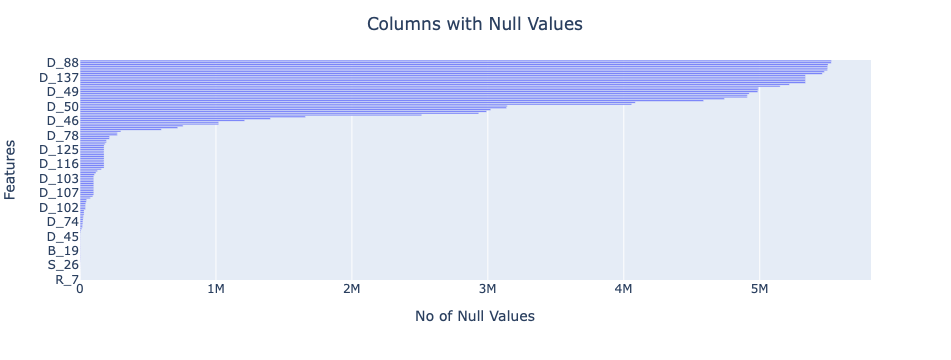

In [10]:
## check null value
df_null = pd.DataFrame(df_train.isna().sum())
df_null = df_null[df_null[0]>0]
df_null = df_null.sort_values(by = 0 ,ascending = True)

fig = px.bar(x=df_null[0],y=df_null.index)
fig.update_layout(showlegend=False, 
                  title_text="Columns with Null Values", 
                  title_x=0.5,
                  xaxis_title="No of Null Values",
                  yaxis_title="Features")
fig.show()

In [11]:
pd.set_option('display.max_columns', None)
df_train.describe()

P_2          D_39           B_1           B_2           R_1  \
count  5.485466e+06  5.531451e+06  5.531451e+06  5.529435e+06  5.531451e+06   
mean   6.563340e-01  1.531172e-01  1.240100e-01  6.214887e-01  7.880270e-02   
std    2.446494e-01  2.700709e-01  2.119869e-01  4.014877e-01  2.263971e-01   
min   -4.589548e-01  5.026190e-09 -7.588799e+00  9.192280e-09  1.534223e-09   
25%    4.803307e-01  4.528464e-03  8.863645e-03  1.053313e-01  2.895934e-03   
50%    6.942950e-01  9.056902e-03  3.132968e-02  8.143328e-01  5.782230e-03   
75%    8.648159e-01  2.366407e-01  1.259019e-01  1.002403e+00  8.660590e-03   
max    1.010000e+00  5.389619e+00  1.324060e+00  1.010000e+00  3.256284e+00   

                S_3          D_41           B_3           D_42          D_43  \
count  4.510907e+06  5.529435e+06  5.529435e+06  791314.000000  3.873055e+06   
mean   2.258455e-01  5.978469e-02  1.325389e-01       0.184974  1.546841e-01   
std    1.933475e-01  2.025443e-01  2.349929e-01       0.228185  2.133977e-01   
min   -6.271320e-01  5.566545e-10  6.285293e-09      -0.000454  1.154550e-07   
25%    1.272588e-01  2.873244e-03  5.227570e-03       0.037516  4.227546e-02   
50%    1.639082e-01  5.746725e-03  9.777230e-03       0.120519  8.851245e-02   
75%    2.581017e-01  8.615665e-03  1.550507e-01       0.250869  1.843206e-01   
max    5.482888e+00  8.988807e+00  1.625262e+00       4.191119  1.011162e+01   

               D_44           B_4          D_45           B_5           R_2  \
count  5.257132e+06  5.531451e+06  5.529434e+06  5.531451e+06  5.531451e+06   
mean   1.184431e-01  1.725543e-01  2.521867e-01  8.311185e-02  4.751791e-02   
std    2.213035e-01  2.224149e-01  2.426829e-01  3.970432e-01  2.017843e-01   
min    5.153088e-10  3.099332e-09  1.563241e-08  2.804822e-11  8.265748e-10   
25%    3.832839e-03  2.750011e-02  5.462902e-02  7.280386e-03  2.613008e-03   
50%    7.668474e-03  8.222598e-02  1.808053e-01  1.537682e-02  5.223076e-03   
75%    1.319484e-01  2.388817e-01  3.733219e-01  5.371837e-02  7.837339e-03   
max    5.634724e+00  1.980329e+01  1.610002e+00  1.442070e+02  1.010000e+00   

               D_46          D_47          D_48          D_49           B_6  \
count  4.319752e+06  5.531451e+06  4.812726e+06  5.455340e+05  5.531218e+06   
mean   4.754784e-01  4.071093e-01  3.816245e-01  1.919254e-01  1.521174e-01   
std    1.698931e-01  2.347989e-01  3.264793e-01  2.783910e-01  1.476770e+00   
min   -1.728934e+01 -2.662164e-02 -9.615277e-03  5.021298e-07 -5.178168e-03   
25%    4.251277e-01  2.323514e-01  8.100685e-02  6.158435e-02  2.048716e-02   
50%    4.596703e-01  3.831664e-01  2.861716e-01  1.303682e-01  8.338487e-02   
75%    5.174066e-01  5.615486e-01  6.693663e-01  2.467636e-01  1.919294e-01   
max    1.631990e+01  1.643096e+00  8.971425e+00  4.584012e+01  1.214517e+03   

                B_7           B_8          D_50          D_51           B_9  \
count  5.531451e+06  5.509183e+06  2.389049e+06  5.531451e+06  5.531451e+06   
mean   1.860836e-01  4.505812e-01  1.744347e-01  1.450790e-01  1.895237e-01   
std    2.304195e-01  4.969413e-01  6.337476e-01  2.423309e-01  2.862744e-01   
min   -2.652748e+00  1.153704e-08 -3.064871e+02  3.551498e-10  6.726070e-09   
25%    2.824729e-02  4.506935e-03  6.476120e-02  3.644930e-03  5.752602e-03   
50%    7.574612e-02  9.020668e-03  1.094135e-01  7.282917e-03  2.587759e-02   
75%    2.709323e-01  1.004175e+00  1.869698e-01  3.360340e-01  3.342967e-01   
max    1.252750e+00  1.019079e+00  2.440427e+02  2.676606e+00  2.742486e+01   

                R_3          D_52           P_3          B_10          D_53  \
count  5.531451e+06  5.501888e+06  5.229959e+06  5.531451e+06  1.446866e+06   
mean   1.208287e-01  1.800504e-01  6.012886e-01  2.316003e-01  7.618341e-02   
std    2.105157e-01  1.738649e-01  1.707992e-01  4.799846e+00  2.026925e-01   
min    2.238322e-09 -7.083109e-03 -1.519690e+00 -2.958481e-03  5.678129e-08   
25%    4.700085e-03  7.387472e-02  5.408657e-01  2.8

In [12]:
df_labels

customer_ID  target
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1       00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                   ...     ...
458908  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0
458909  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0
458910  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0
458911  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1
458912  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0

[458913 rows x 2 columns]

In [10]:
df_train.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  5531451 non-null  object 
 1    S_2          5531451 non-null  object 
 2    P_2          5485466 non-null  float64
 3    D_39         5531451 non-null  float64
 4    B_1          5531451 non-null  float64
 5    B_2          5529435 non-null  float64
 6    R_1          5531451 non-null  float64
 7    S_3          4510907 non-null  float64
 8    D_41         5529435 non-null  float64
 9    B_3          5529435 non-null  float64
 10   D_42         791314 non-null   float64
 11   D_43         3873055 non-null  float64
 12   D_44         5257132 non-null  float64
 13   B_4          5531451 non-null  float64
 14   D_45         5529434 non-null  float64
 15   B_5          5531451 non-null  float64
 16   R_2          5531451 non-null  float64
 17   D_46         4319752 non-

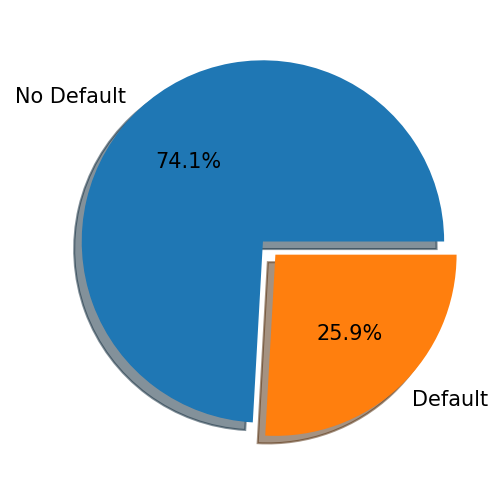

In [43]:
y = np.array(df_labels.groupby(['target']).size())

plt.pie(y, labels=['No Default', 'Default'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True)
plt.show() 

In [39]:
df_train_stat_num = df_train.customer_ID.value_counts().value_counts()

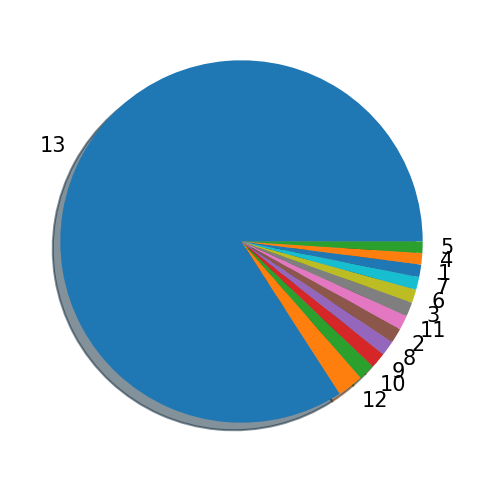

In [55]:
y = np.array(df_train_stat_num)

plt.pie(y, labels=df_train_stat_num.index, shadow=True)
plt.show() 

In [27]:
df_train_stat = df_train.customer_ID.value_counts().to_frame().reset_index().rename(columns={'index': 'customer_ID', 'customer_ID': 'stat_num'}).merge(df_labels,on='customer_ID',how='left')

In [60]:
df_train_stat.groupby(['stat_num', 'target']).size()

stat_num  target
1         0           3401
          1           1719
2         0           4156
          1           1942
3         0           3706
          1           2072
4         0           2728
          1           1945
5         0           2837
          1           1834
6         0           3377
          1           2138
7         0           3023
          1           2175
8         0           3377
          1           2733
9         0           3525
          1           2886
10        0           3614
          1           3107
11        0           3298
          1           2663
12        0           6487
          1           4136
13        0         296556
          1          89478
dtype: int64

In [63]:
df_train = df_train.merge(df_labels,on='customer_ID',how='left')

In [71]:
features = df_train.drop(['customer_ID', 'S_2', 'target'], axis=1).columns.to_list()
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68",
]
num_features = [col for col in features if col not in cat_features]

### Categorical Features

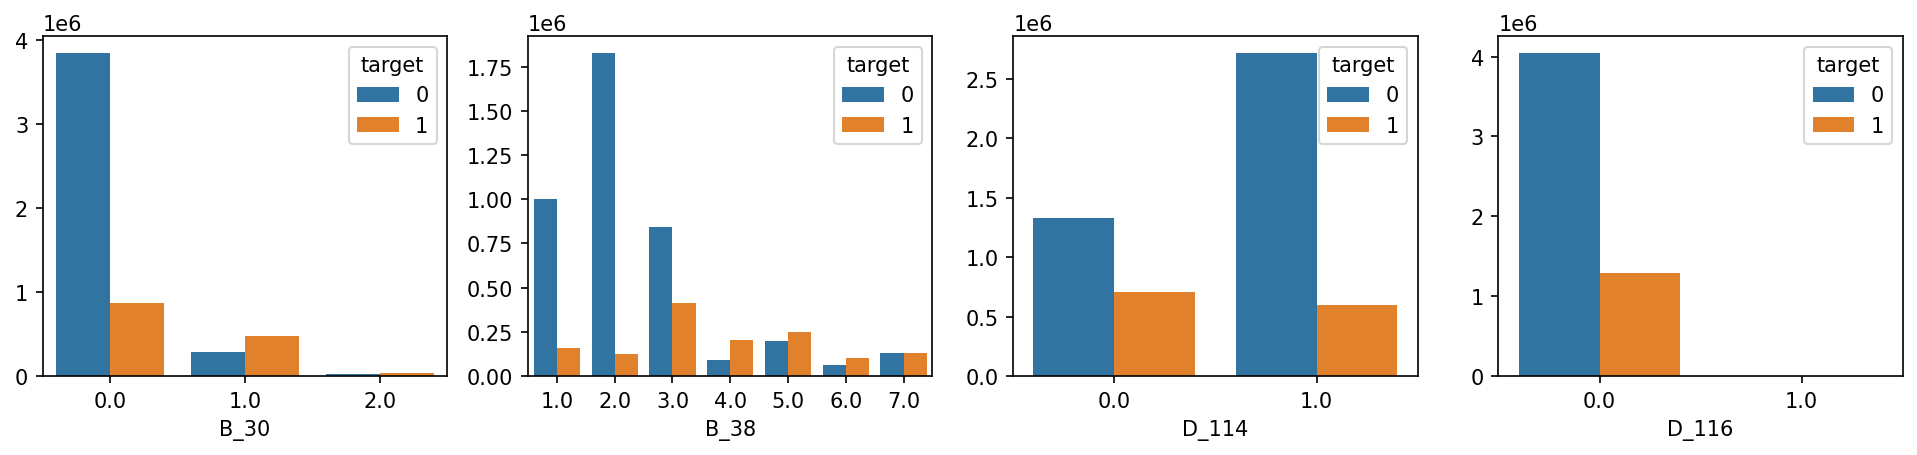

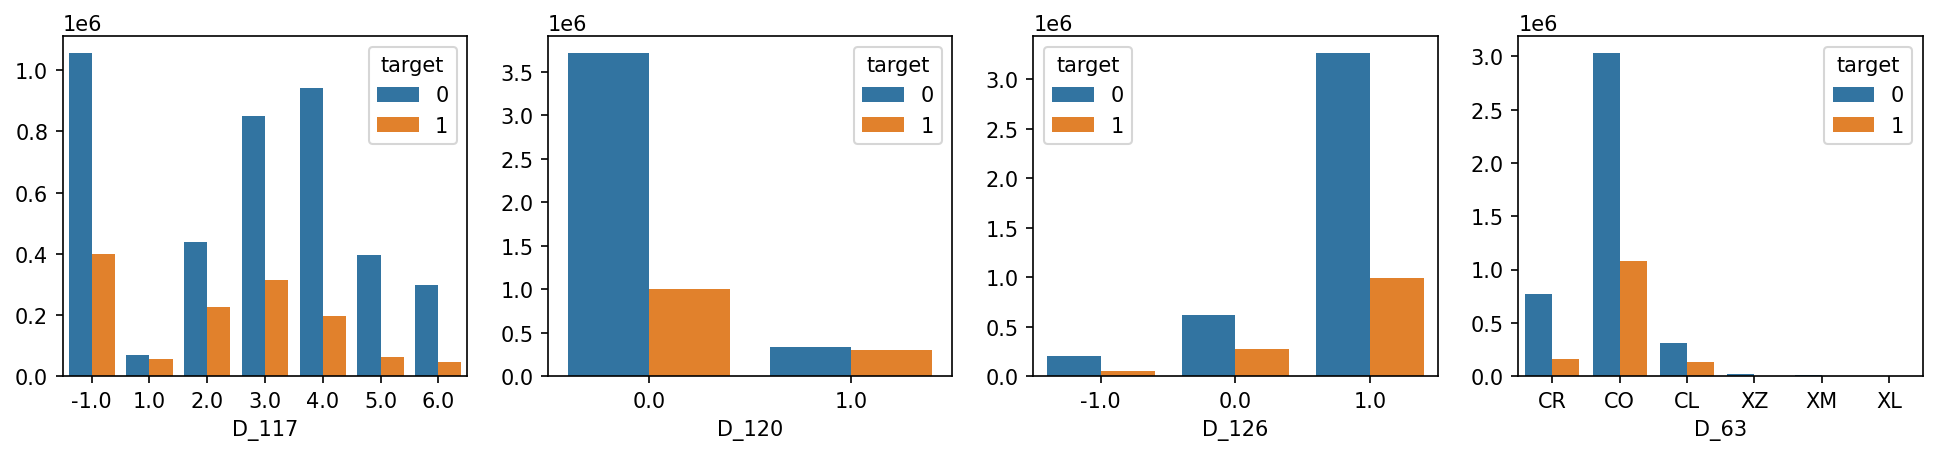

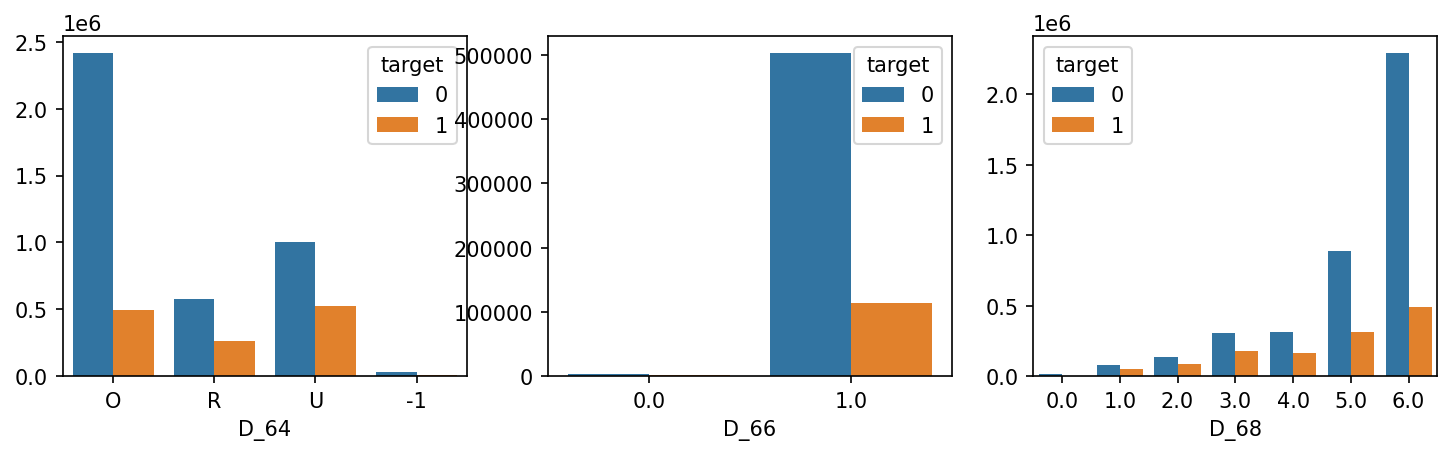

In [68]:
ind = 0
for col in cat_features:
    if ind % 4 == 0:
        plt.figure(figsize=(16, 3))
    plt.subplot(1, 4, ind % 4 + 1)
    
    sn.countplot(data=df_train, x=col, hue="target")
    plt.ylabel("")
    
    if ind % 4 == 3:
        plt.show()
    
    ind += 1

### Numerical Features

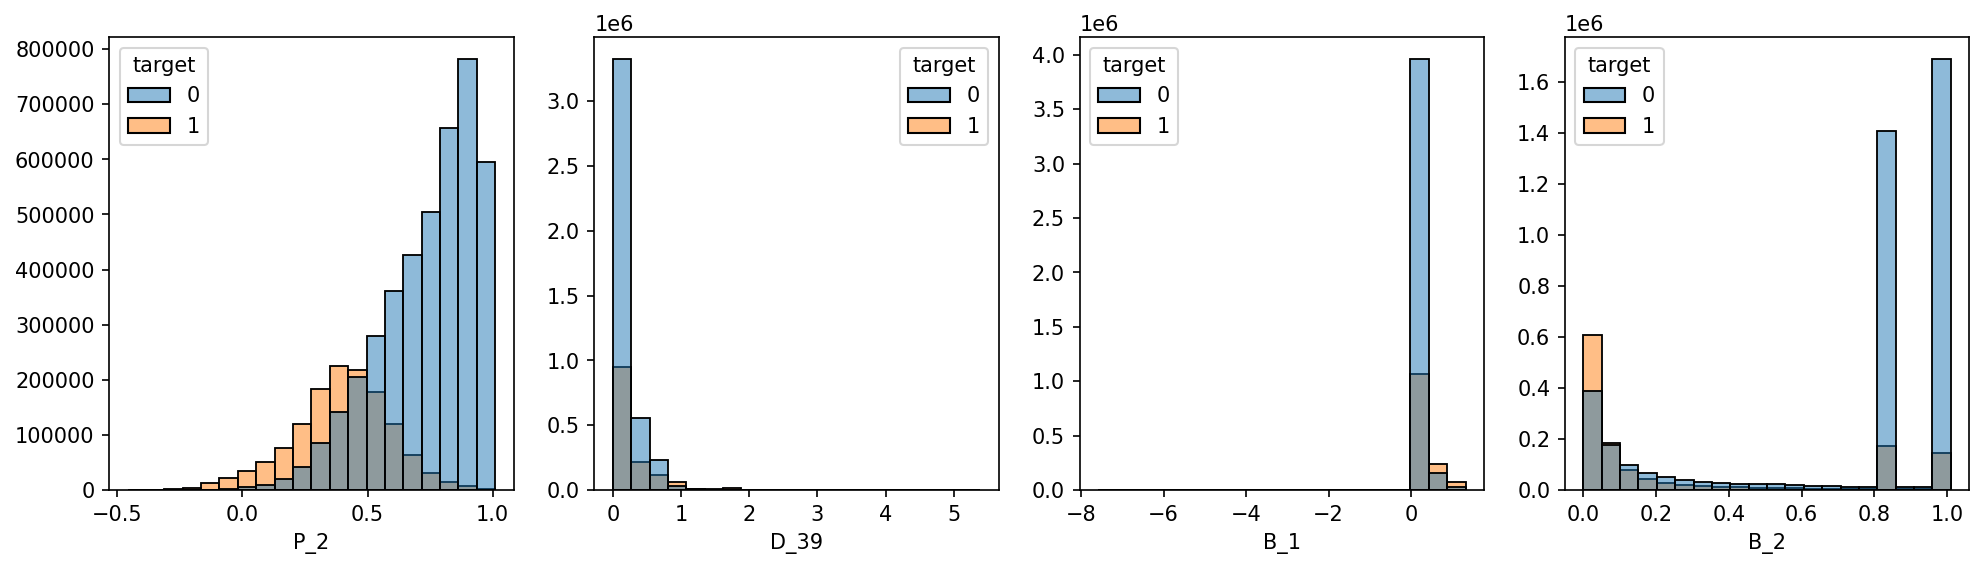

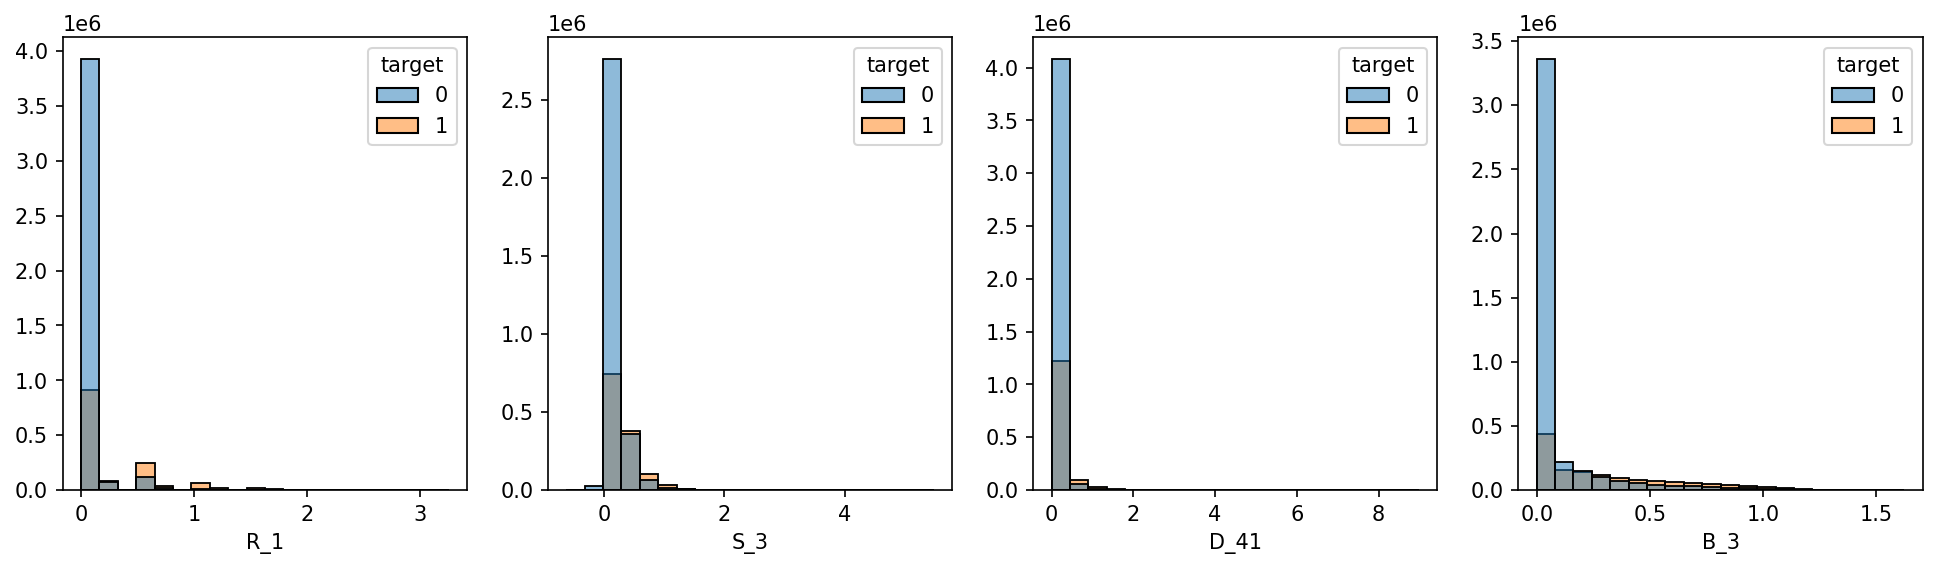

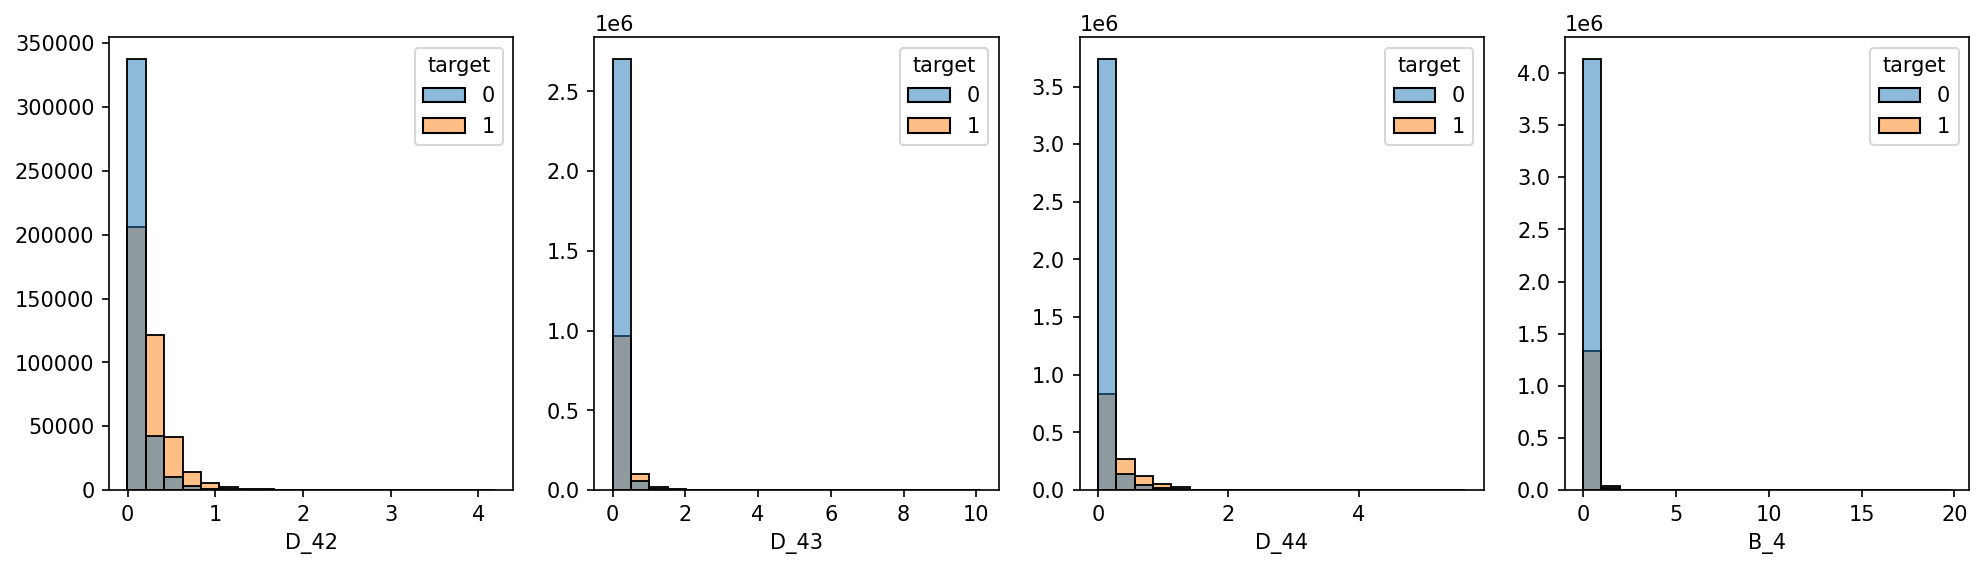

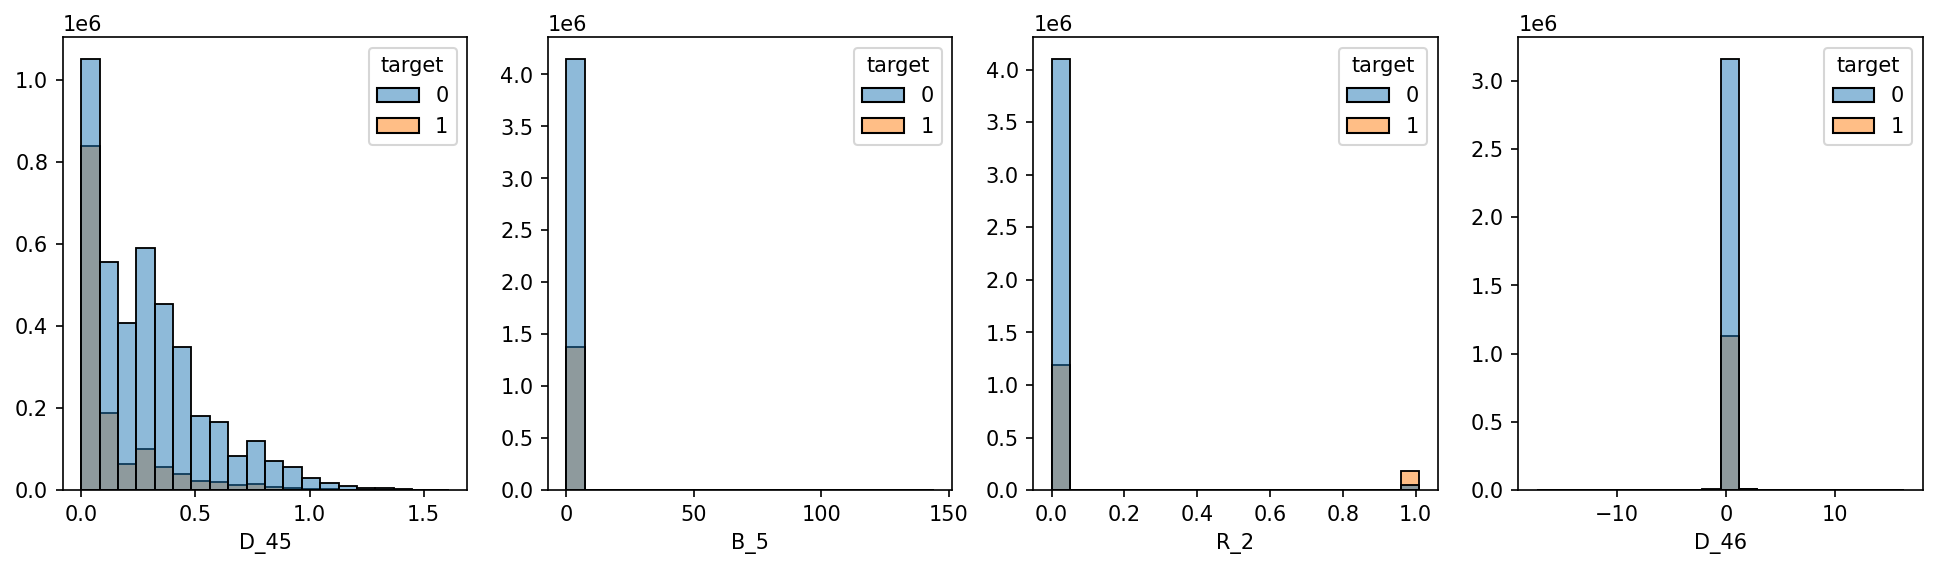

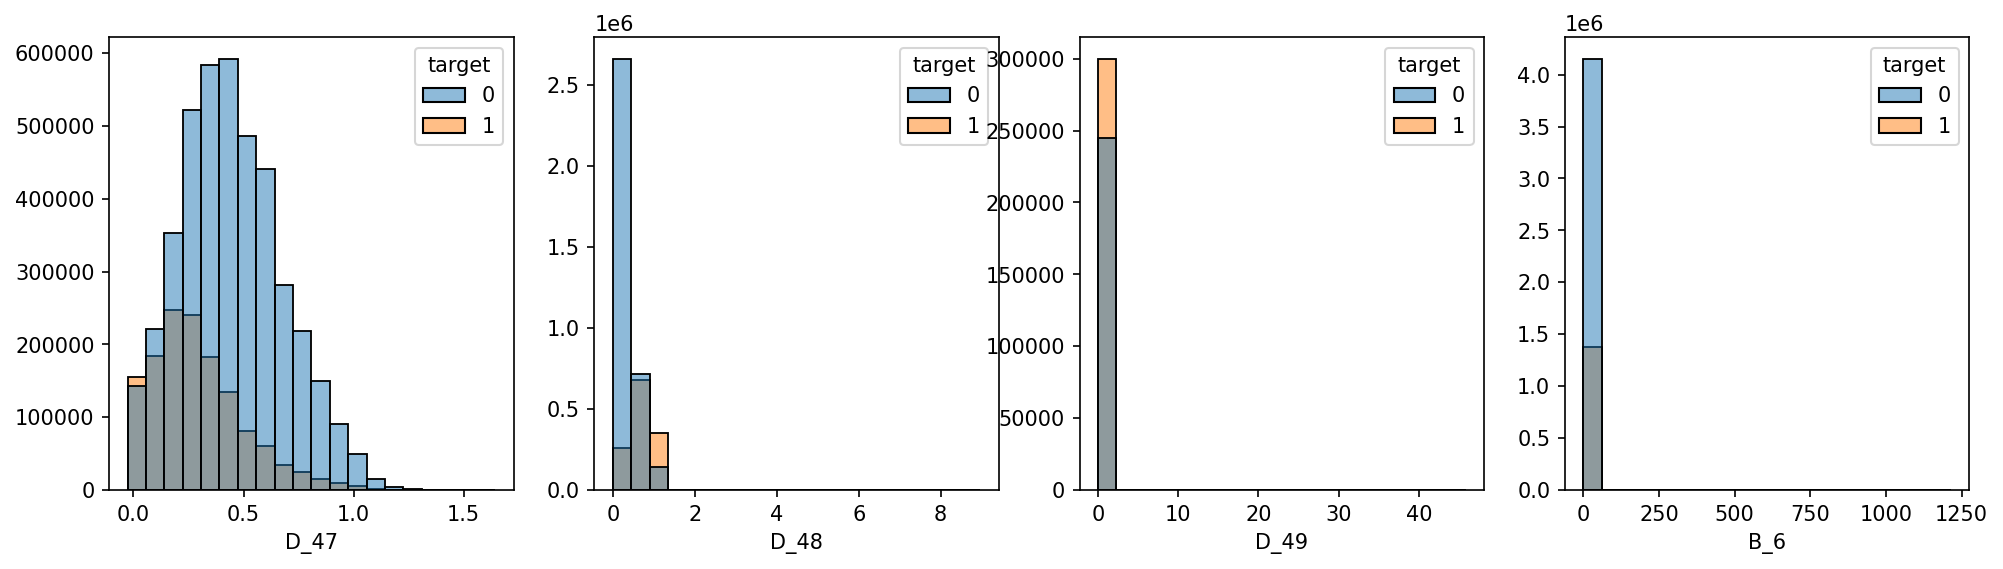

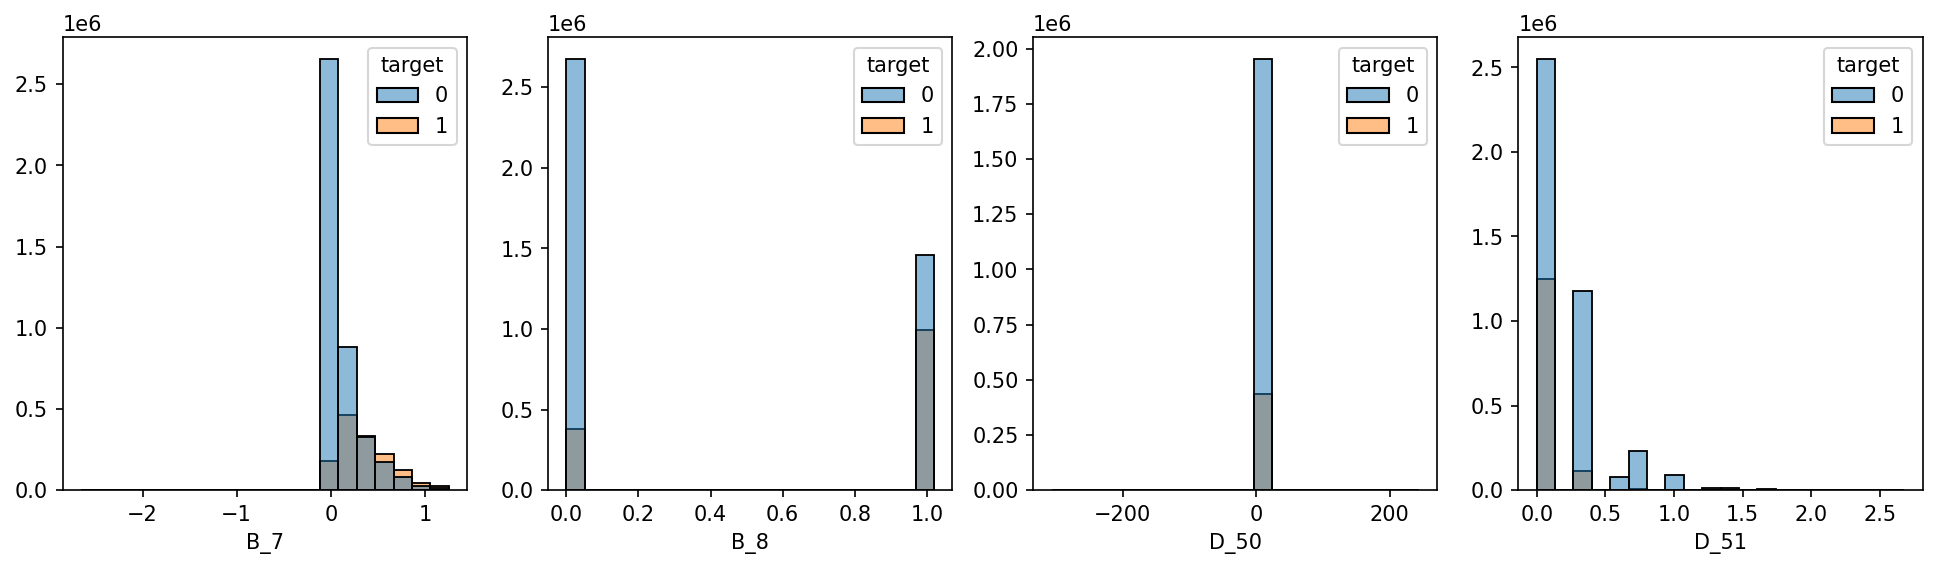

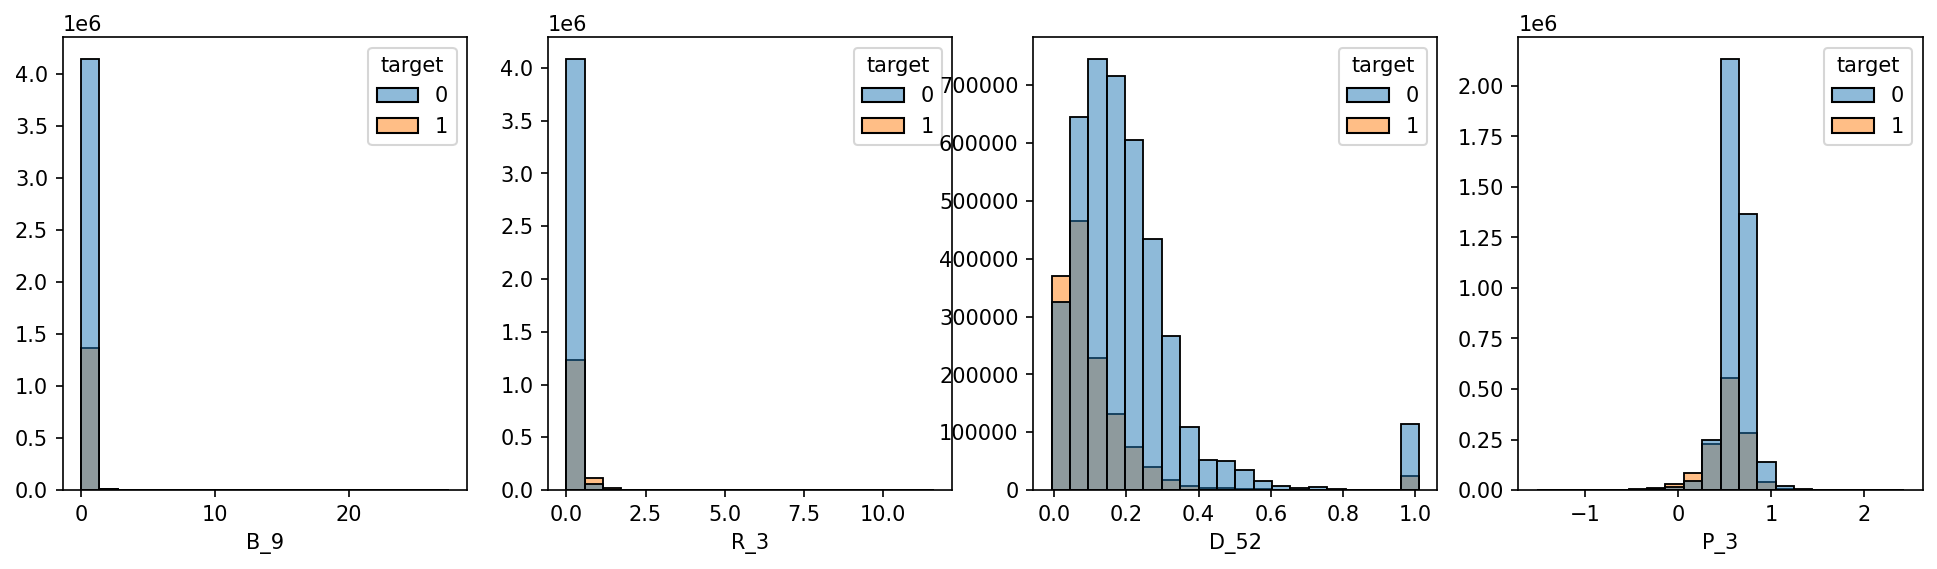

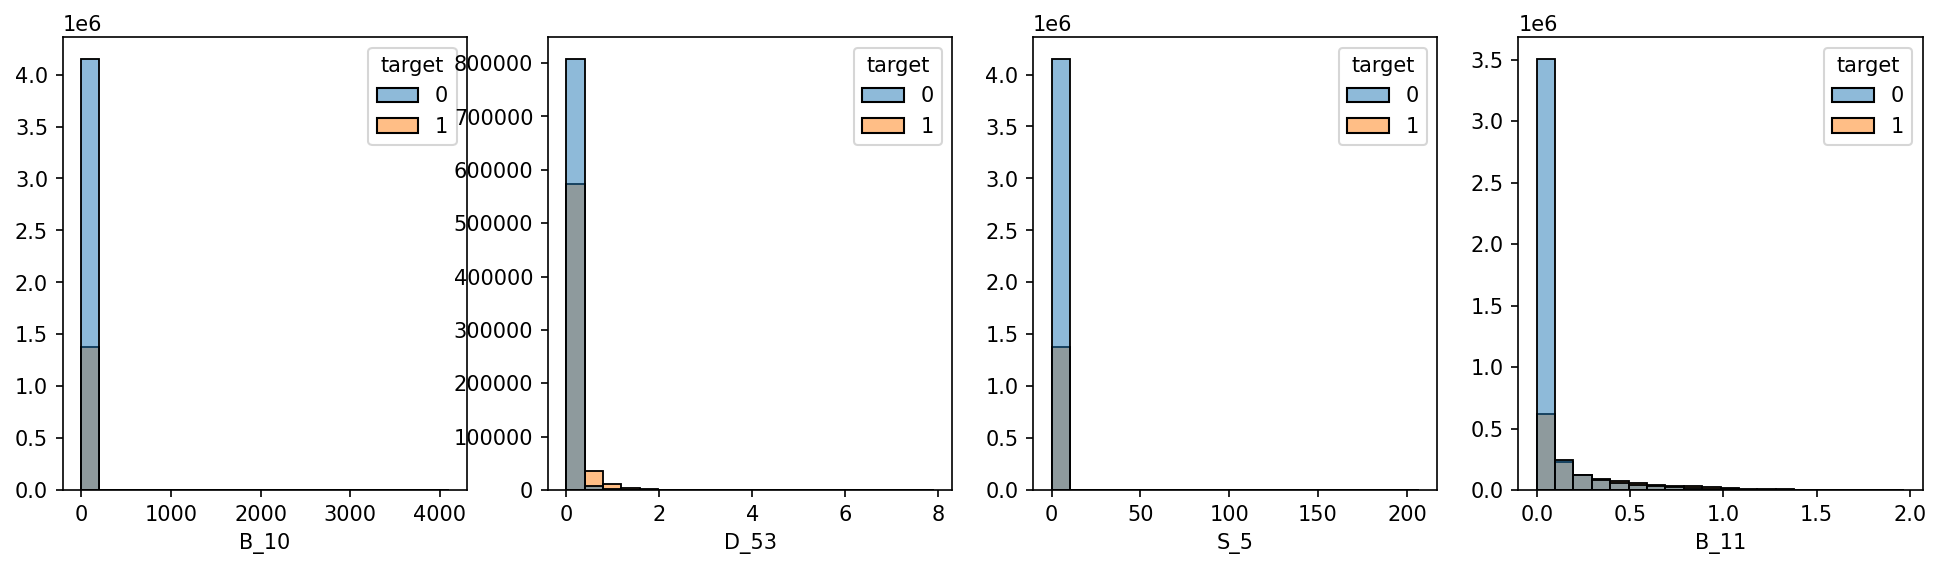

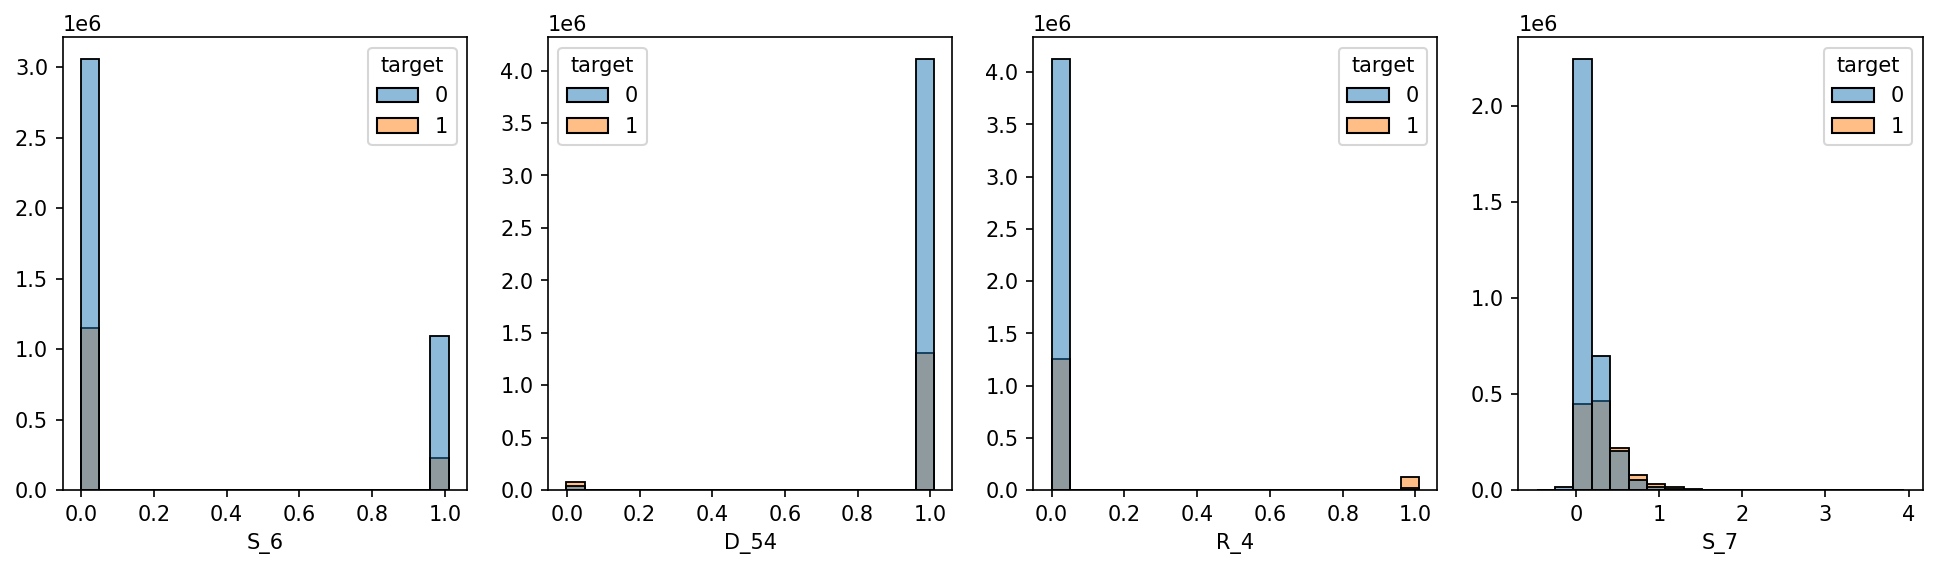

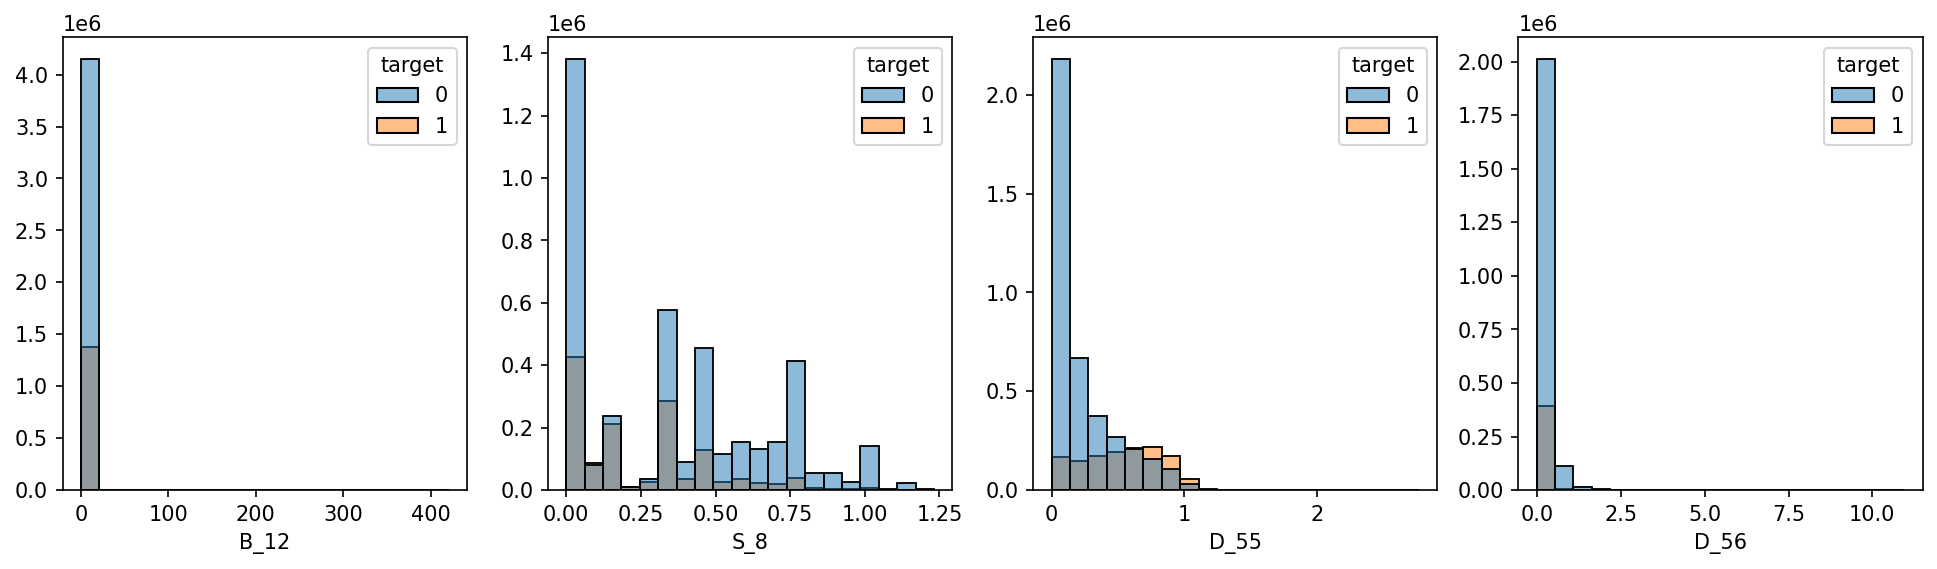

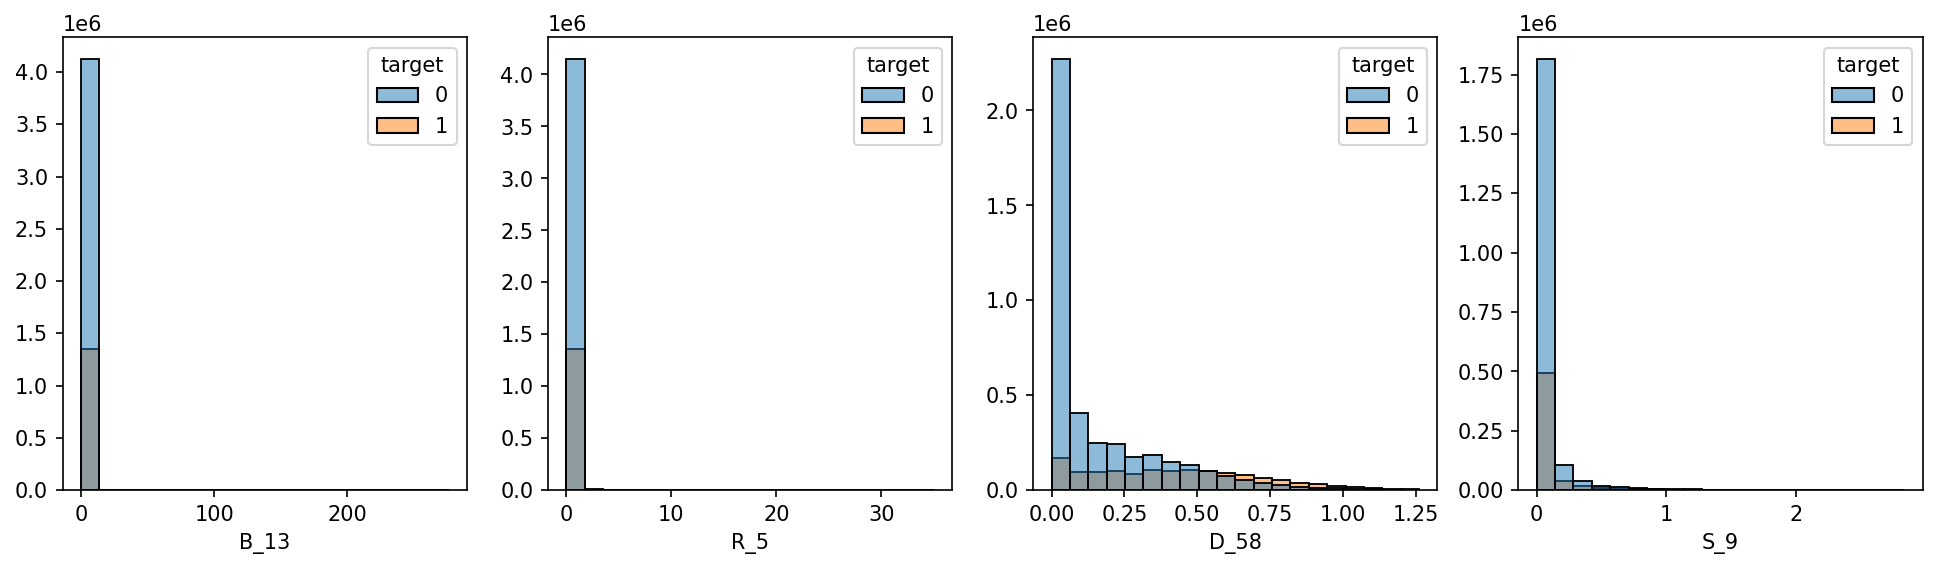

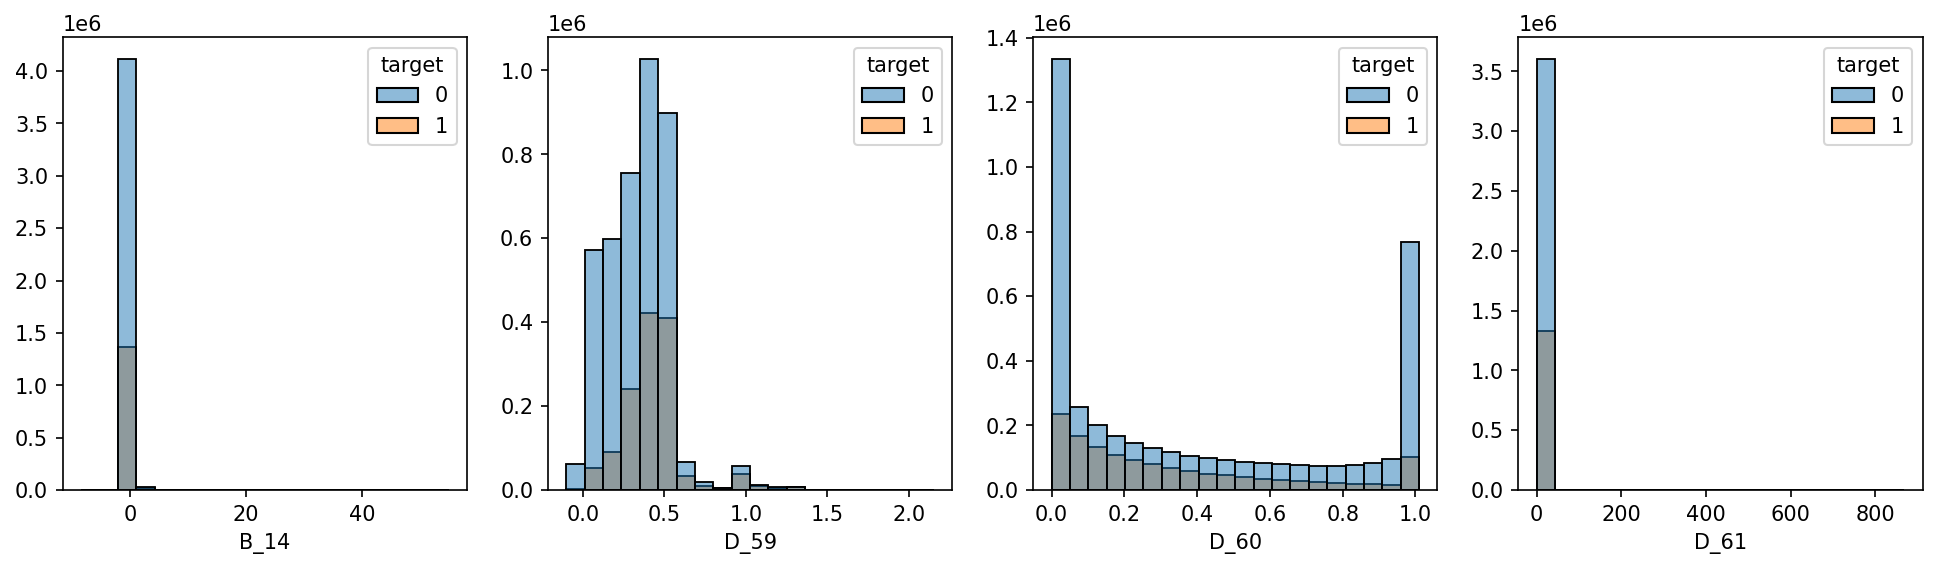

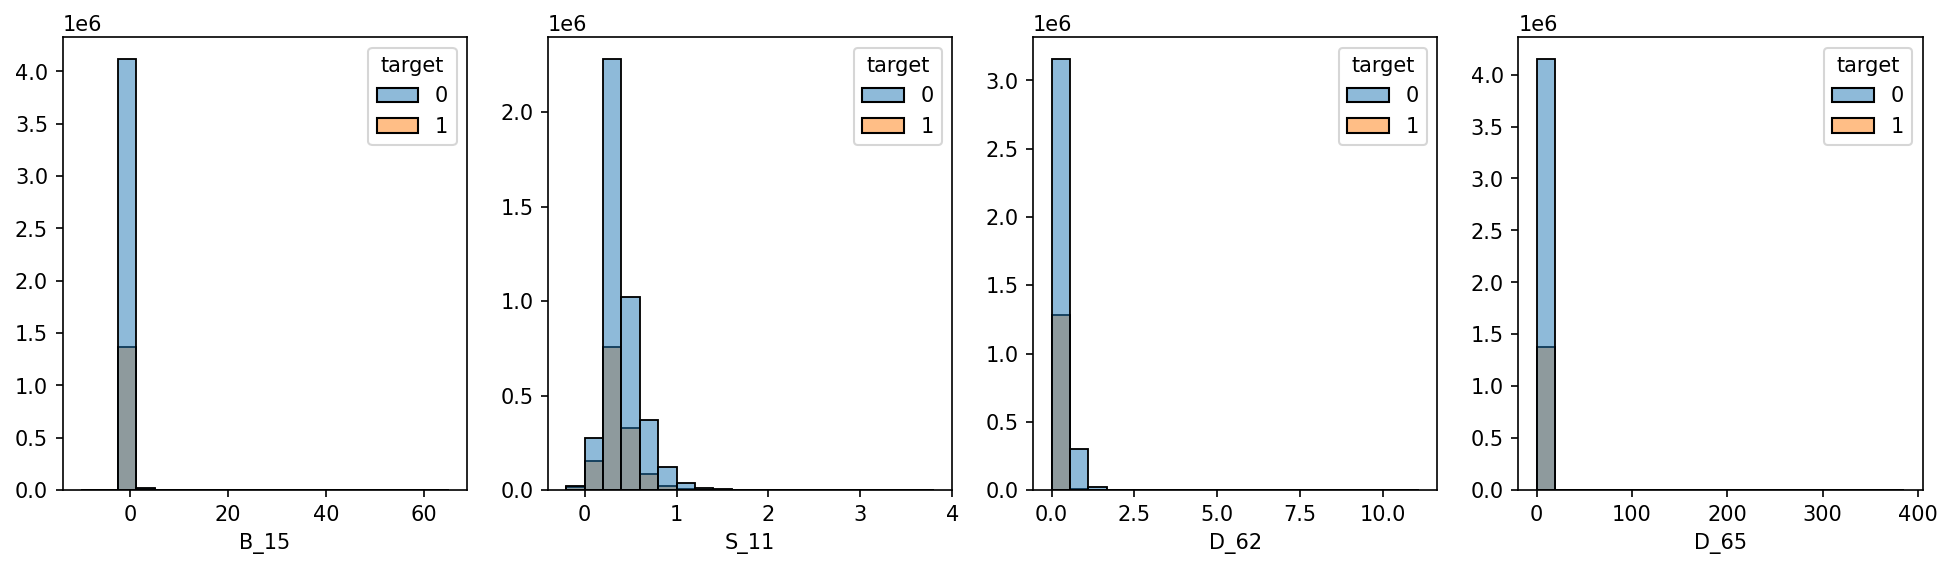

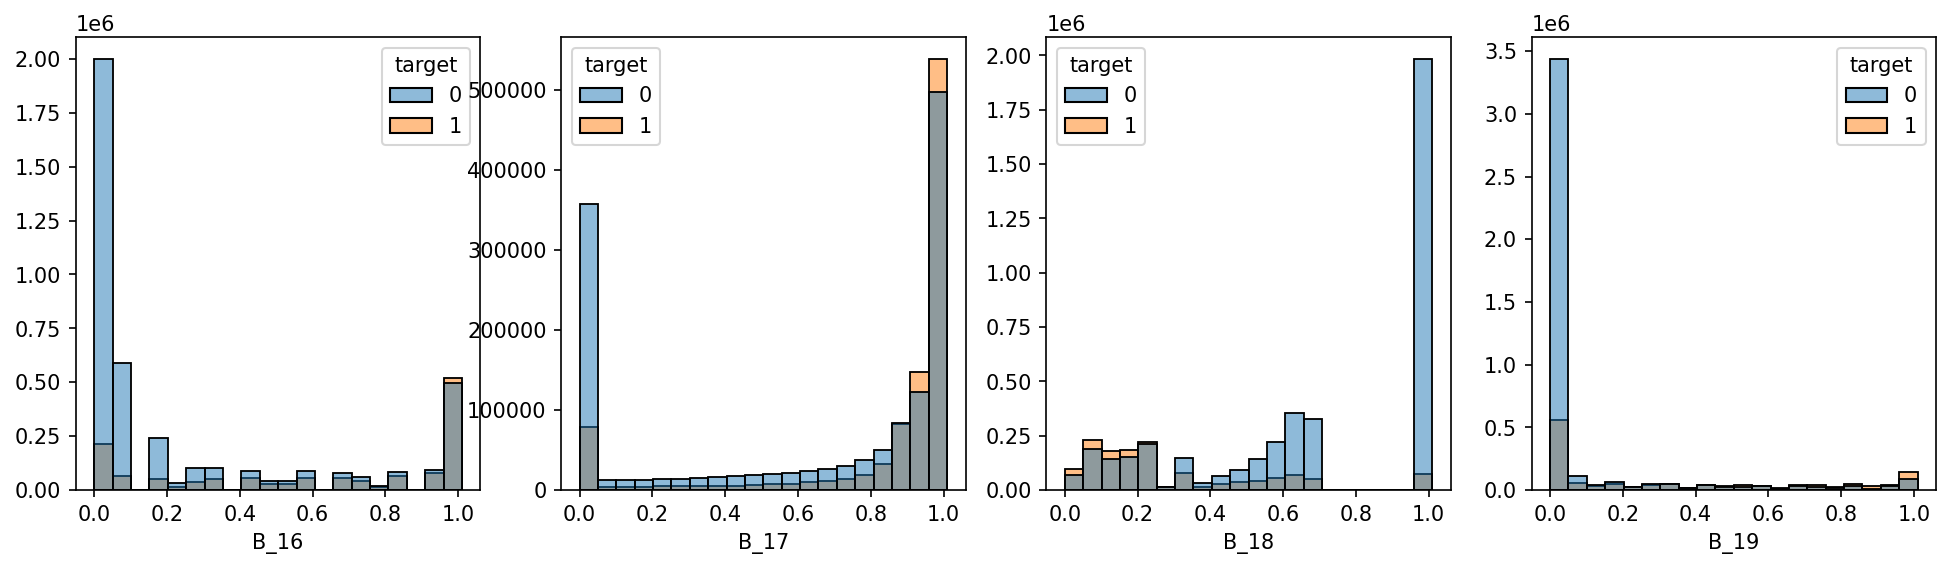

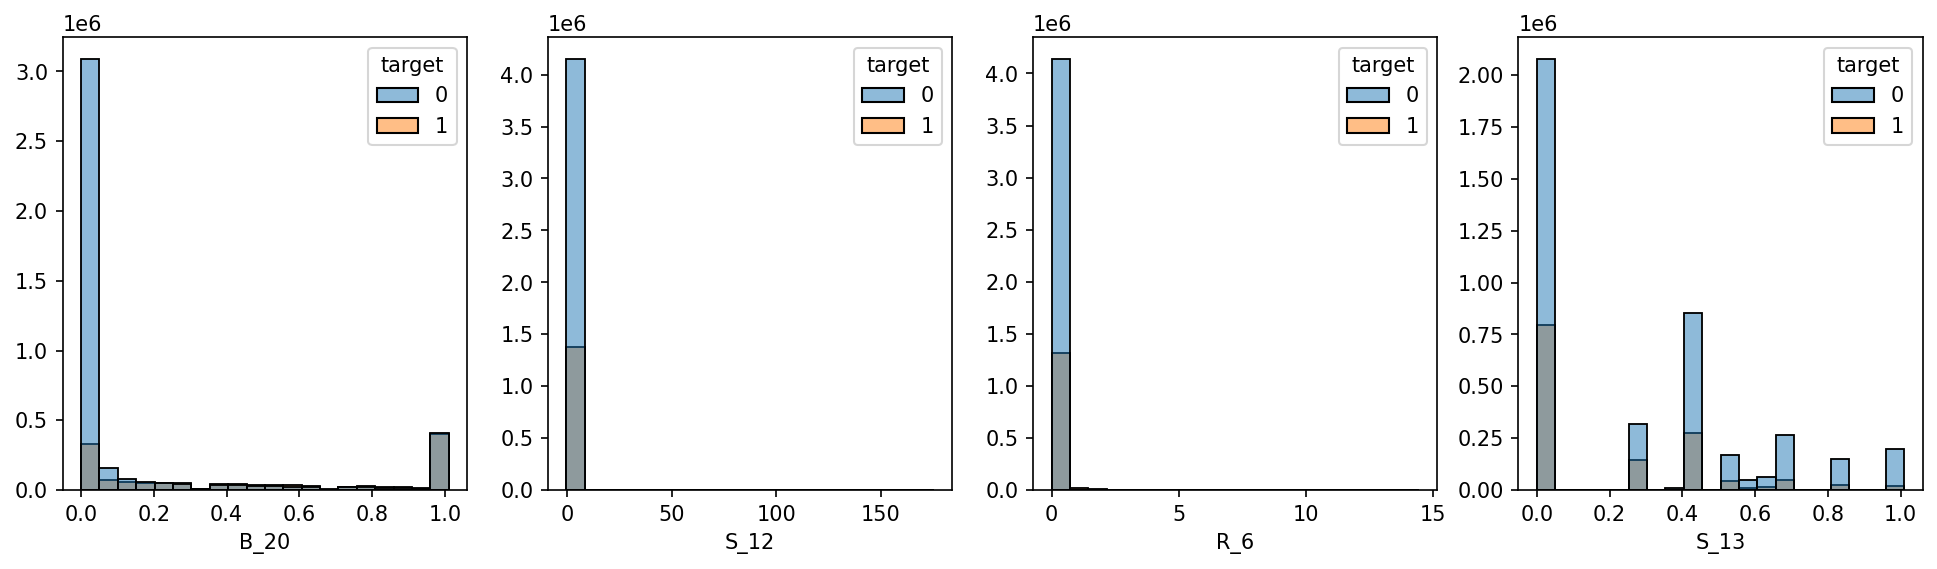

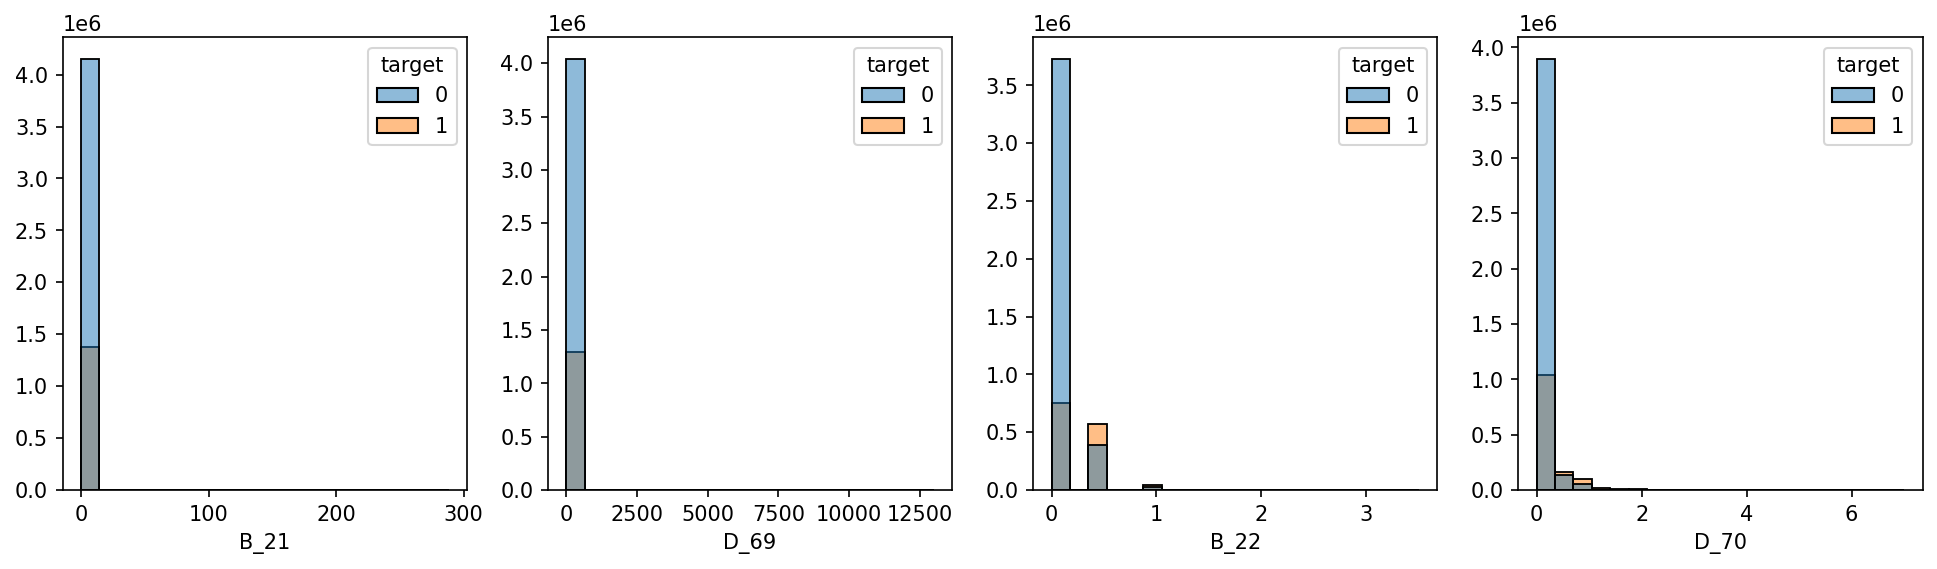

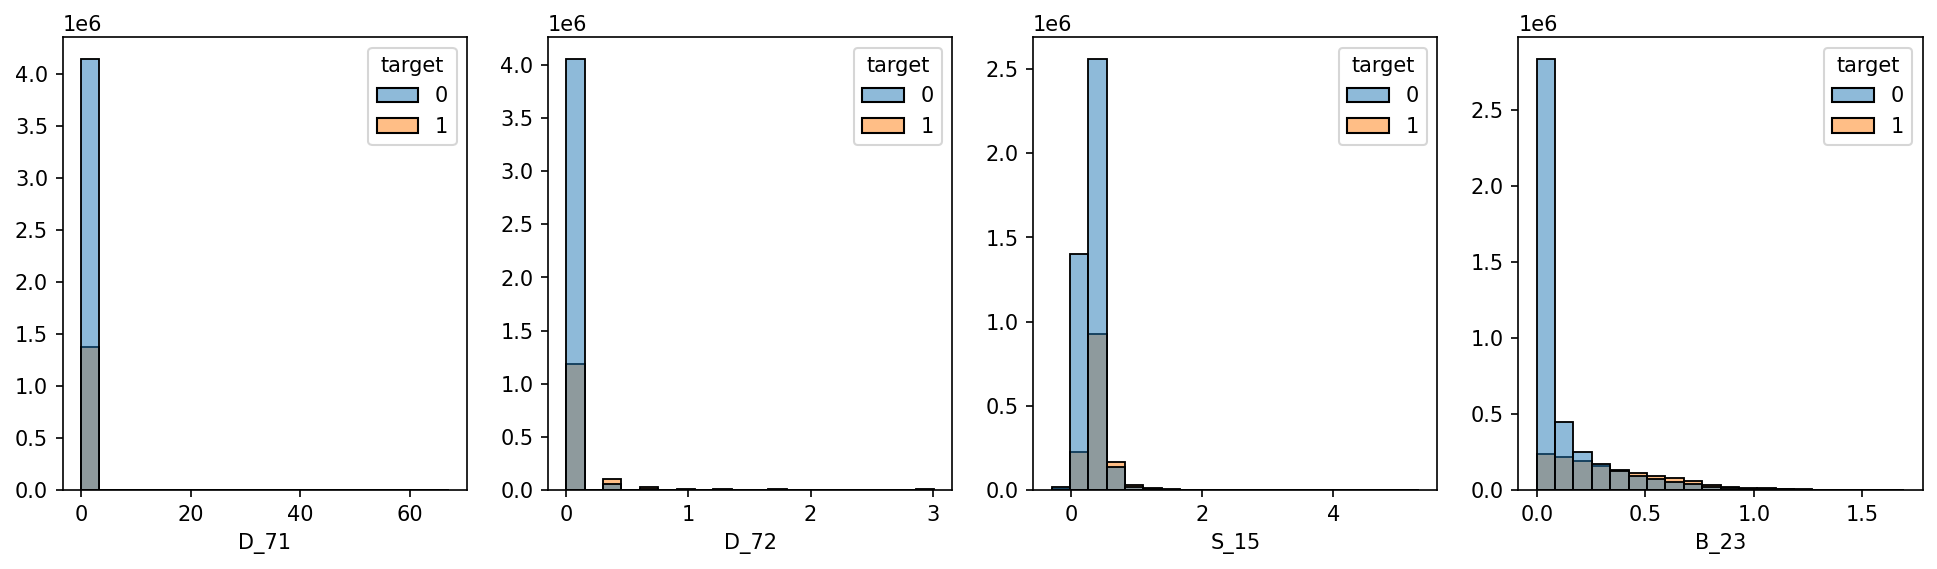

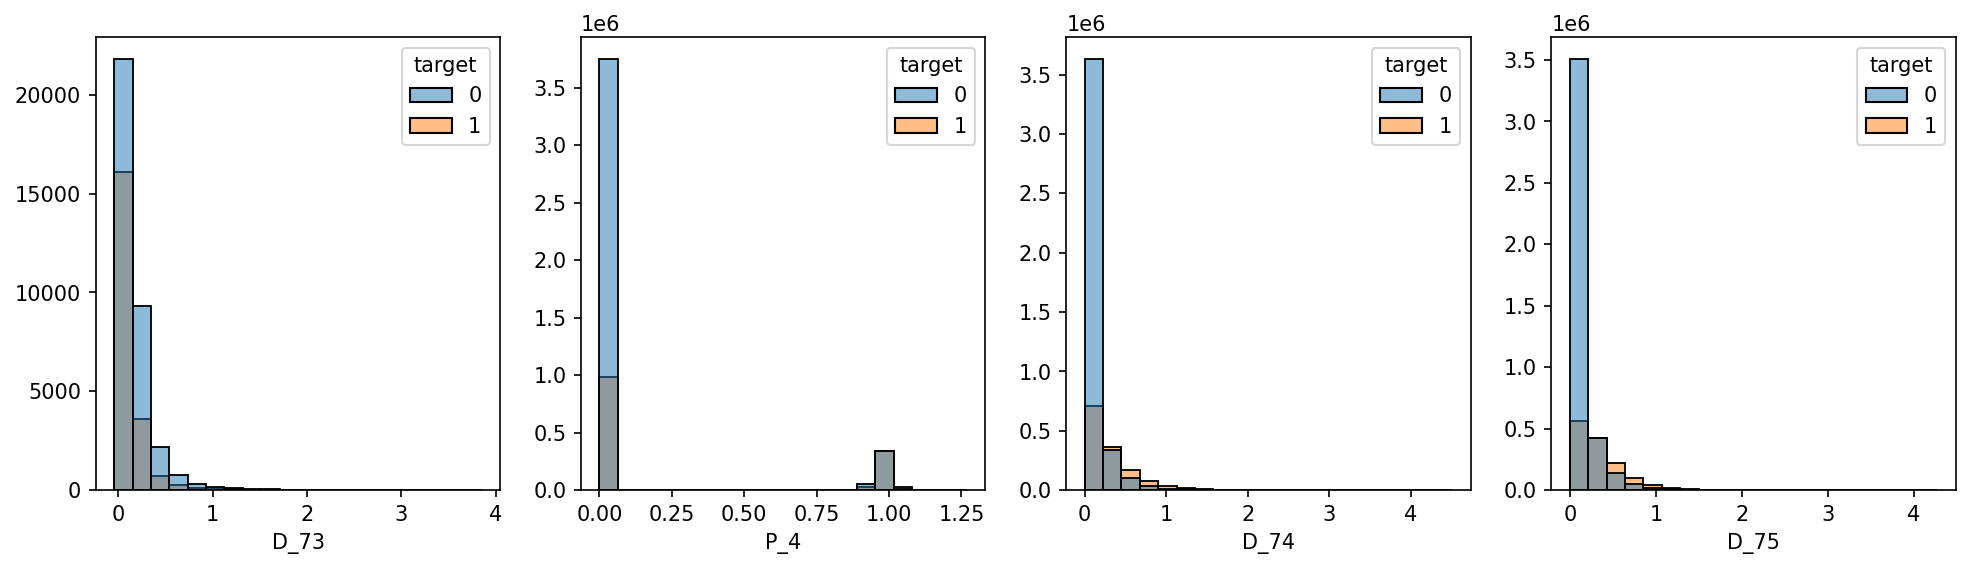

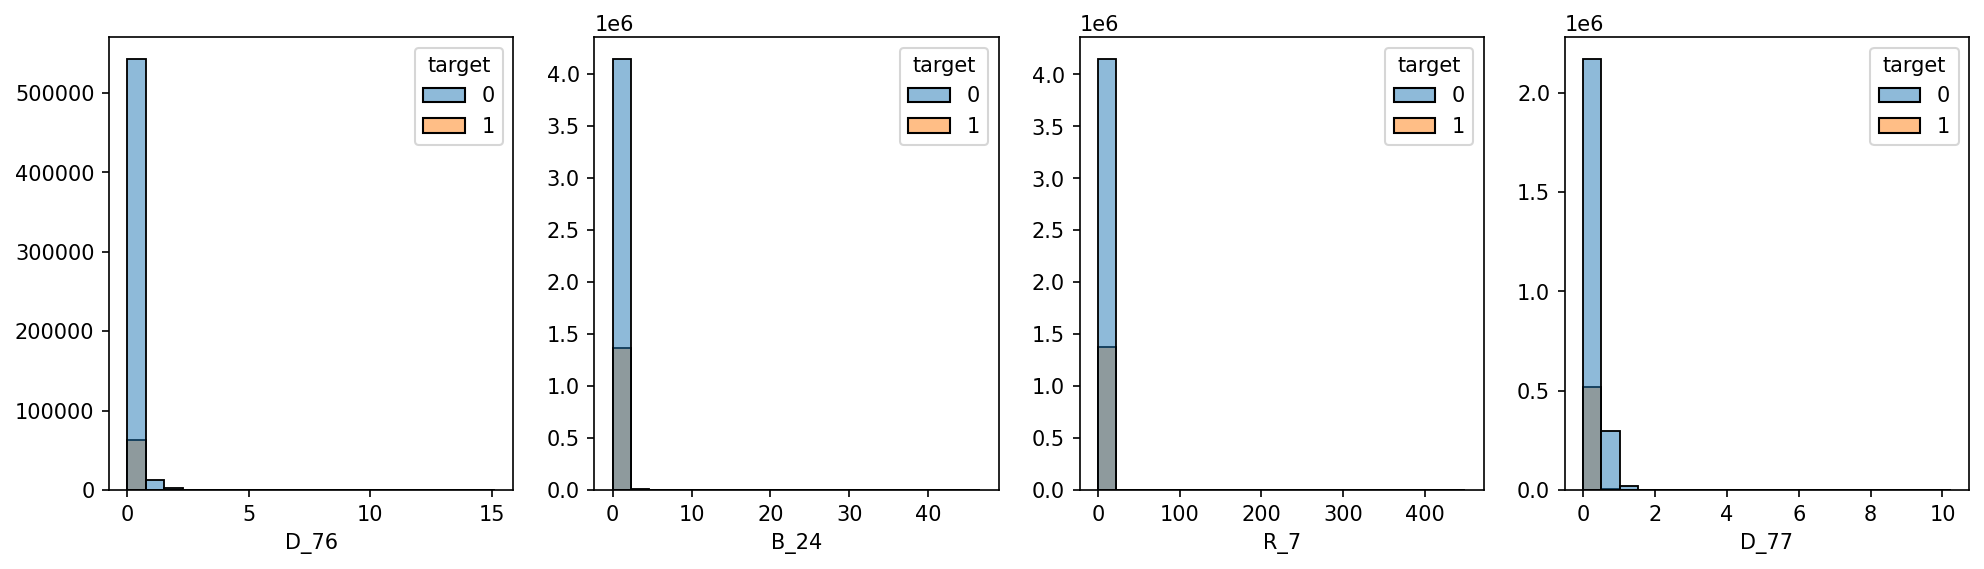

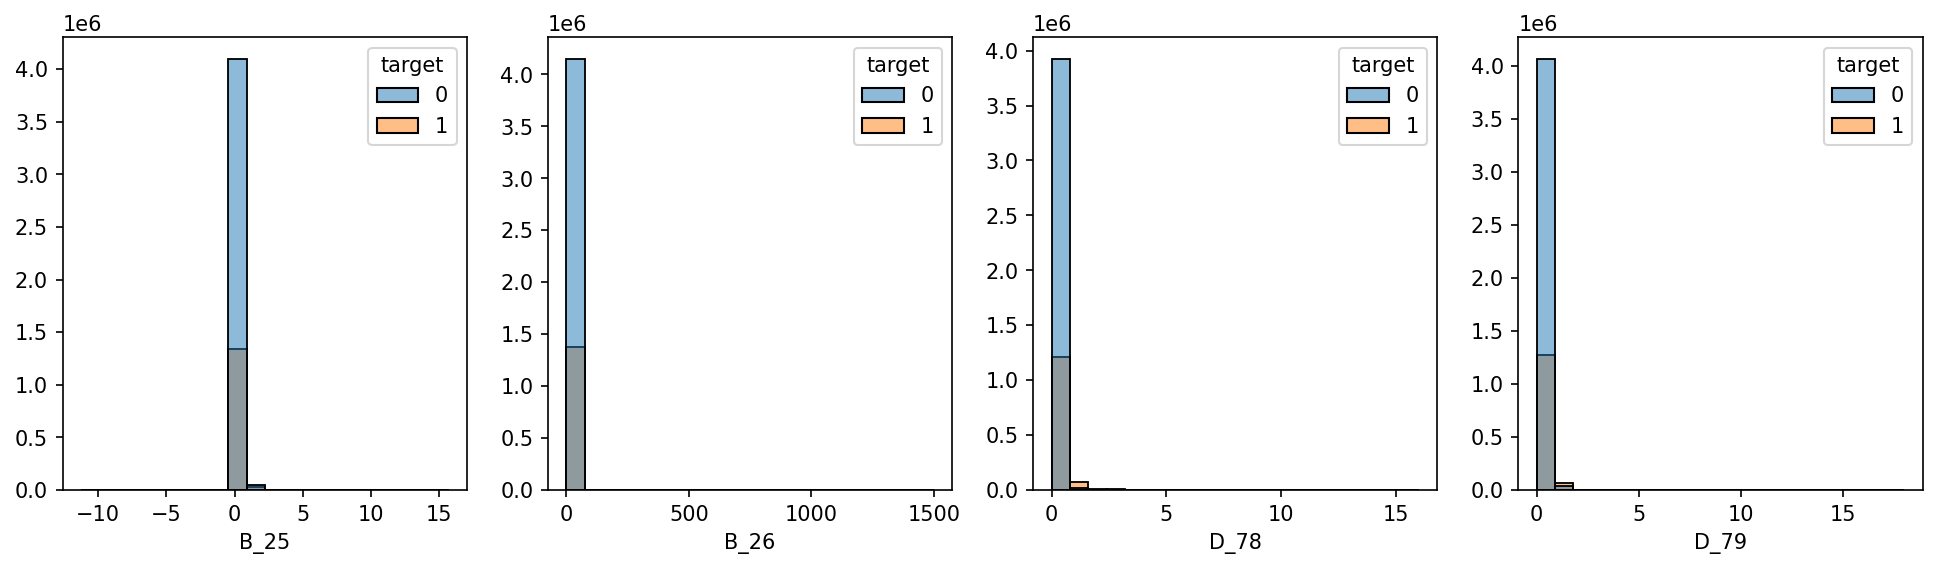

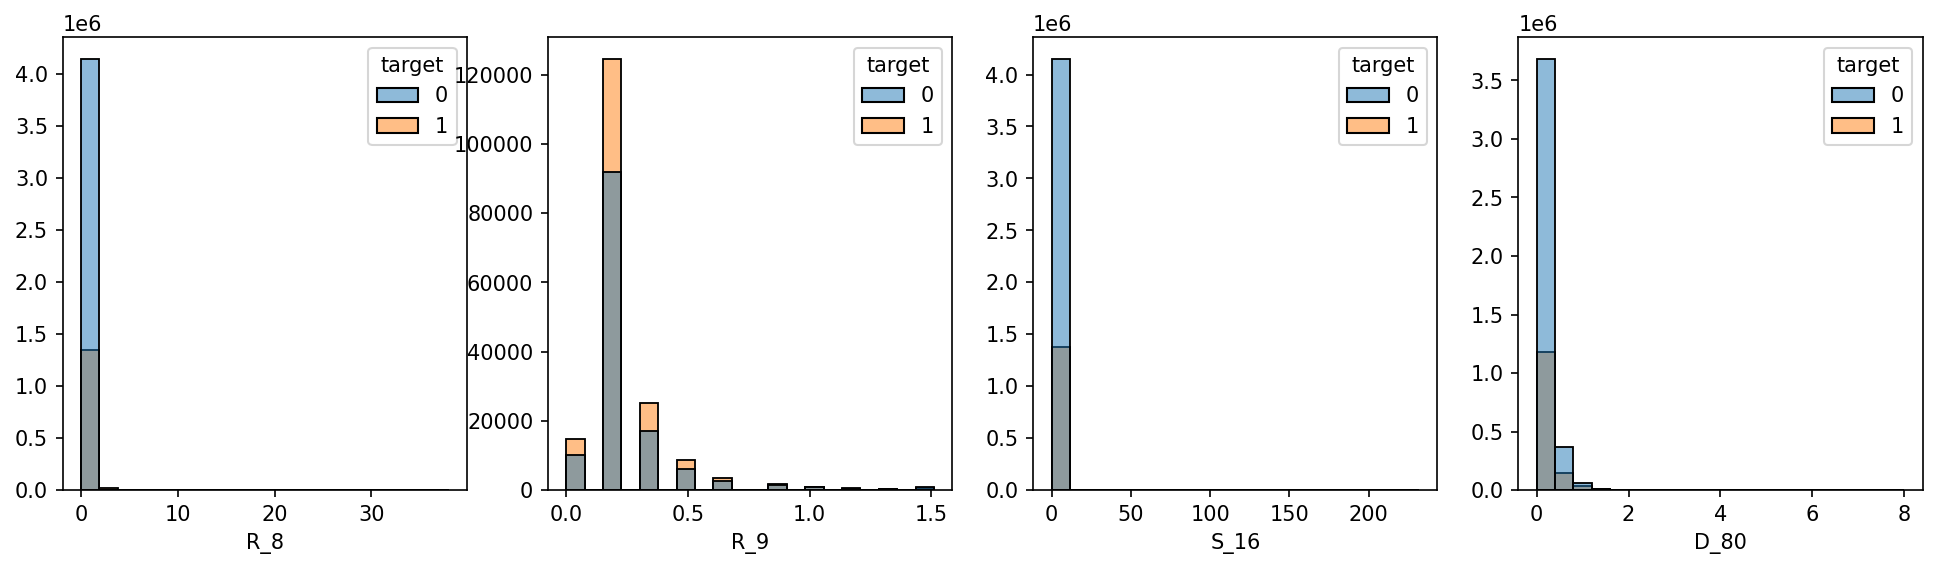

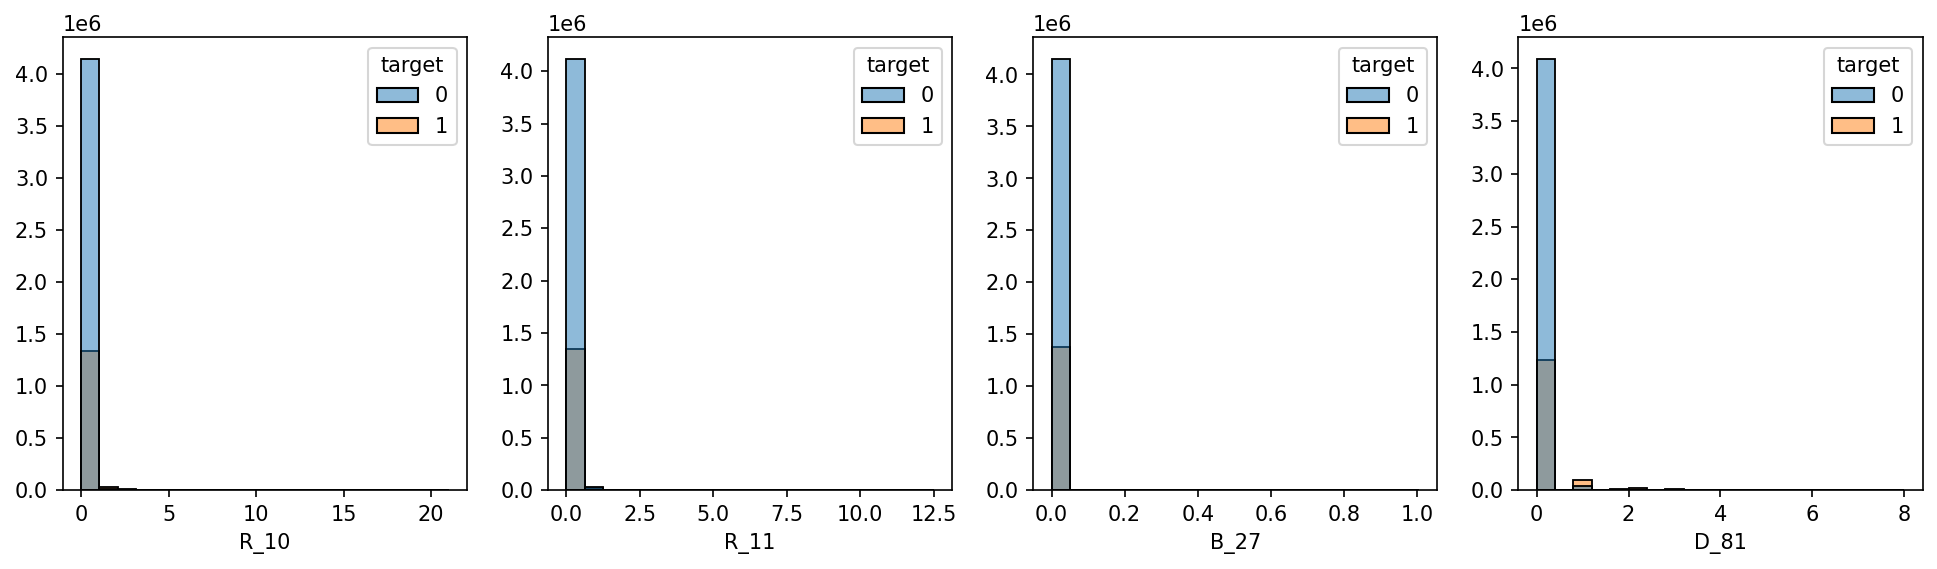

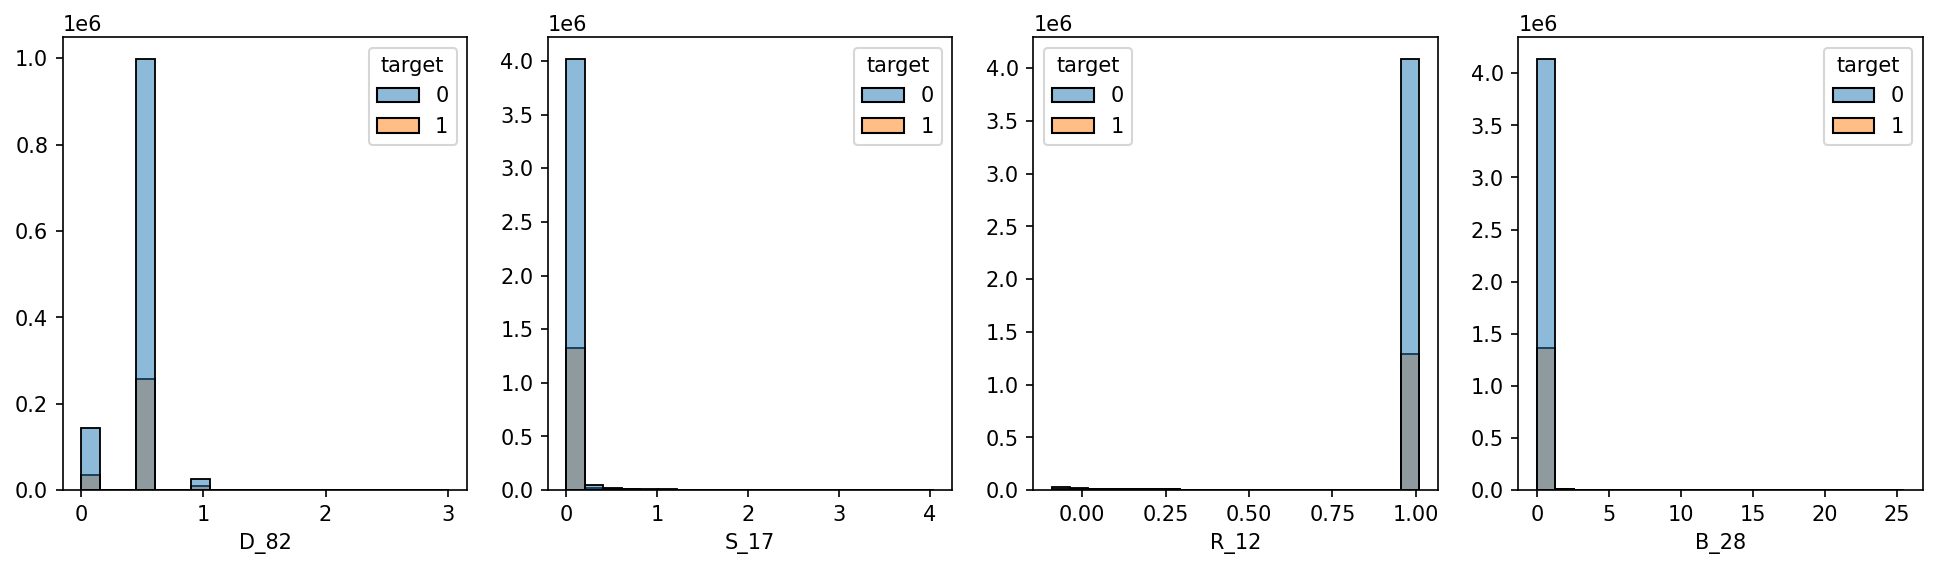

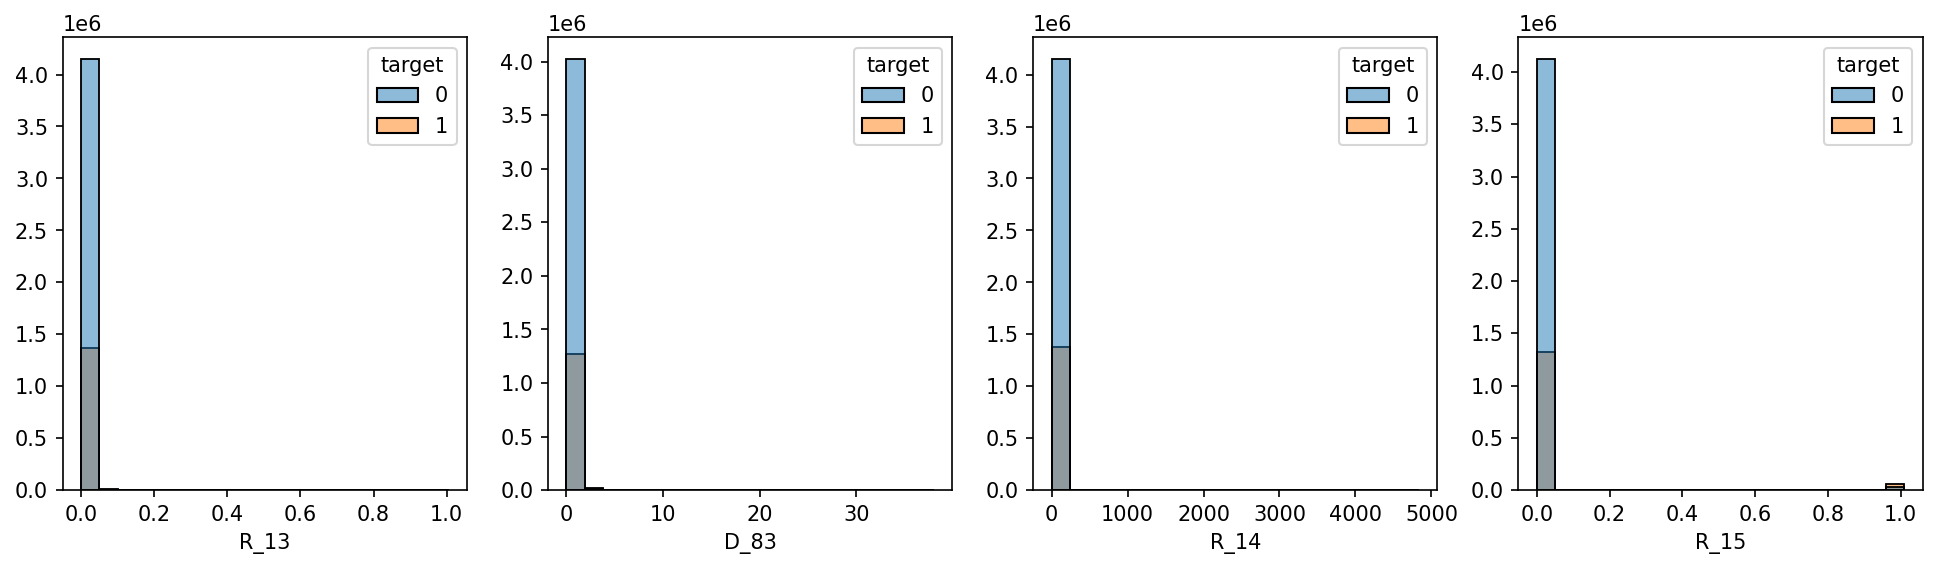

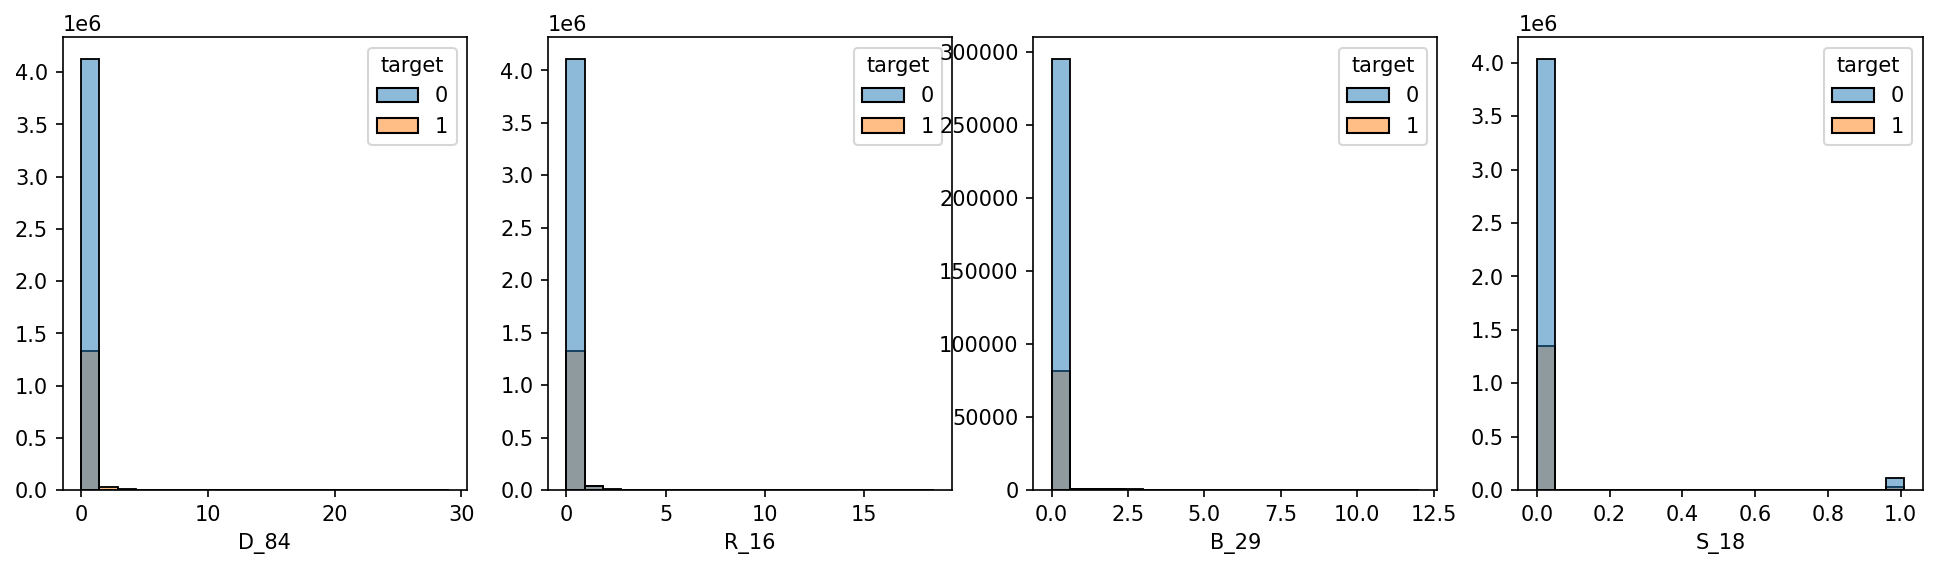

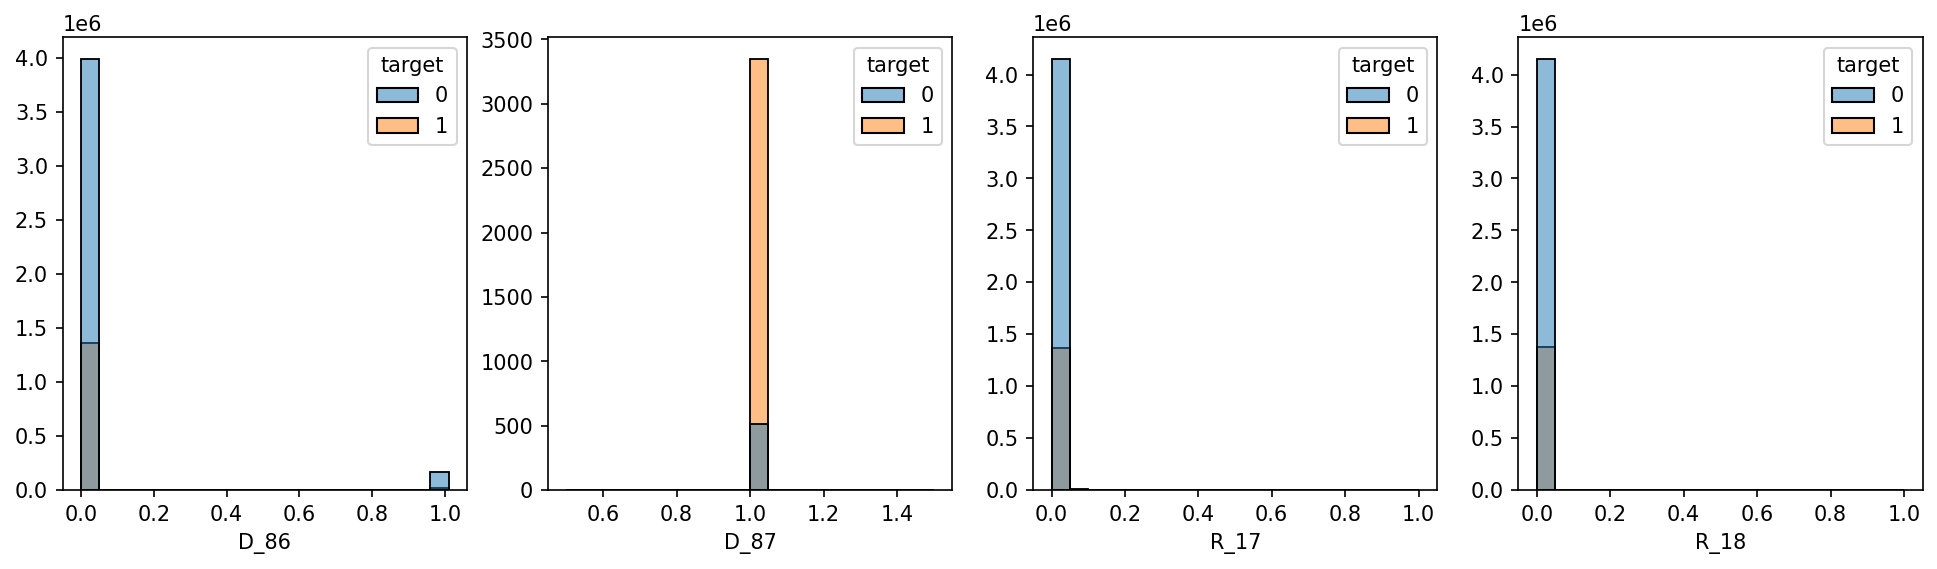

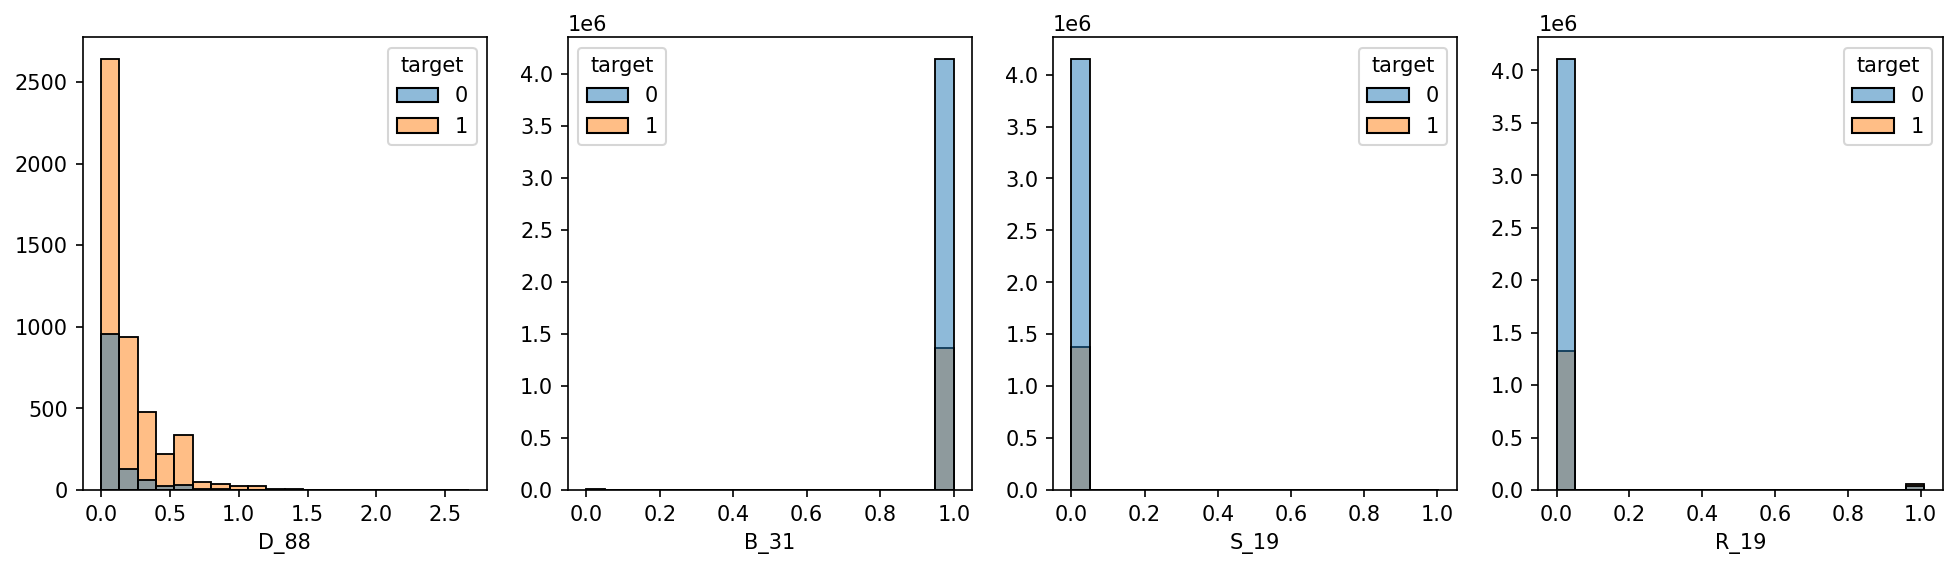

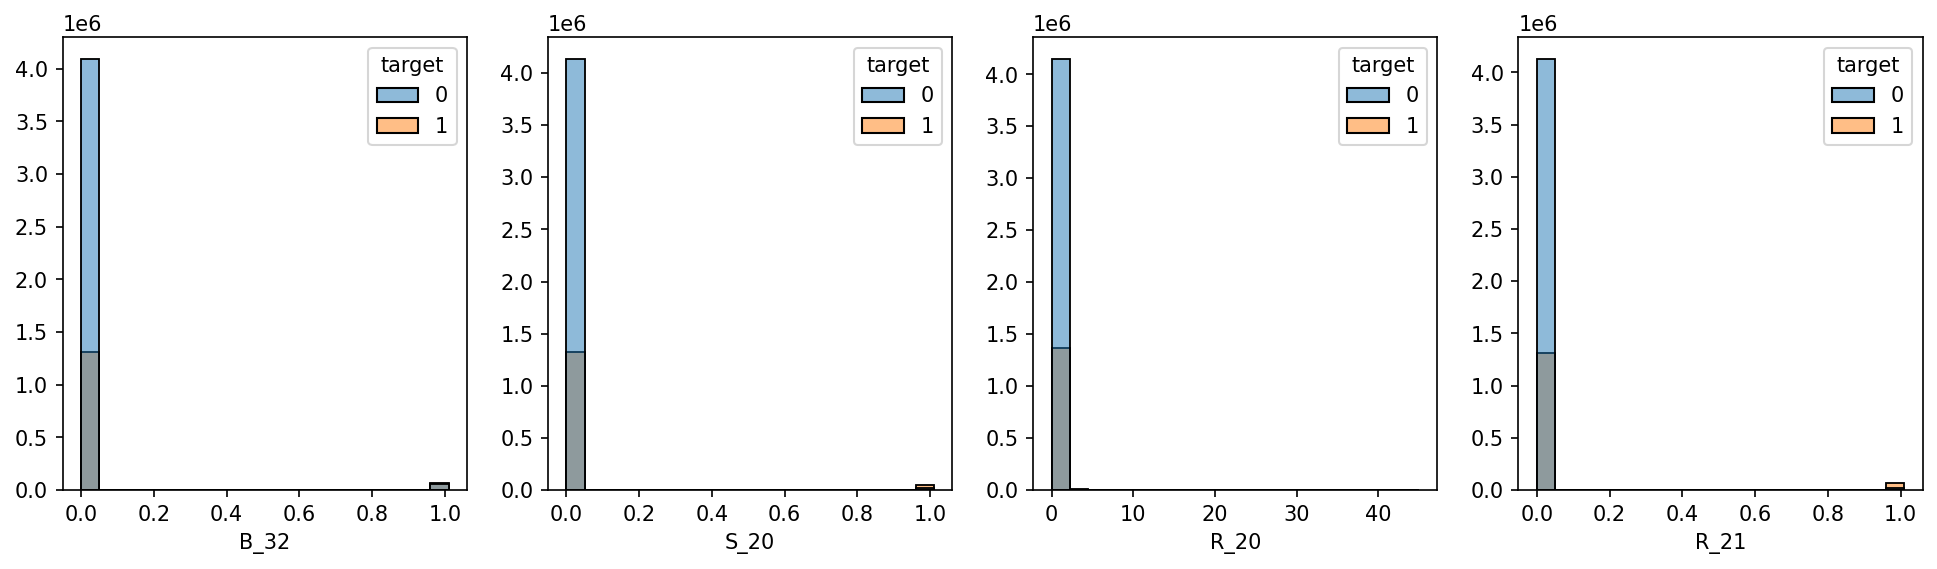

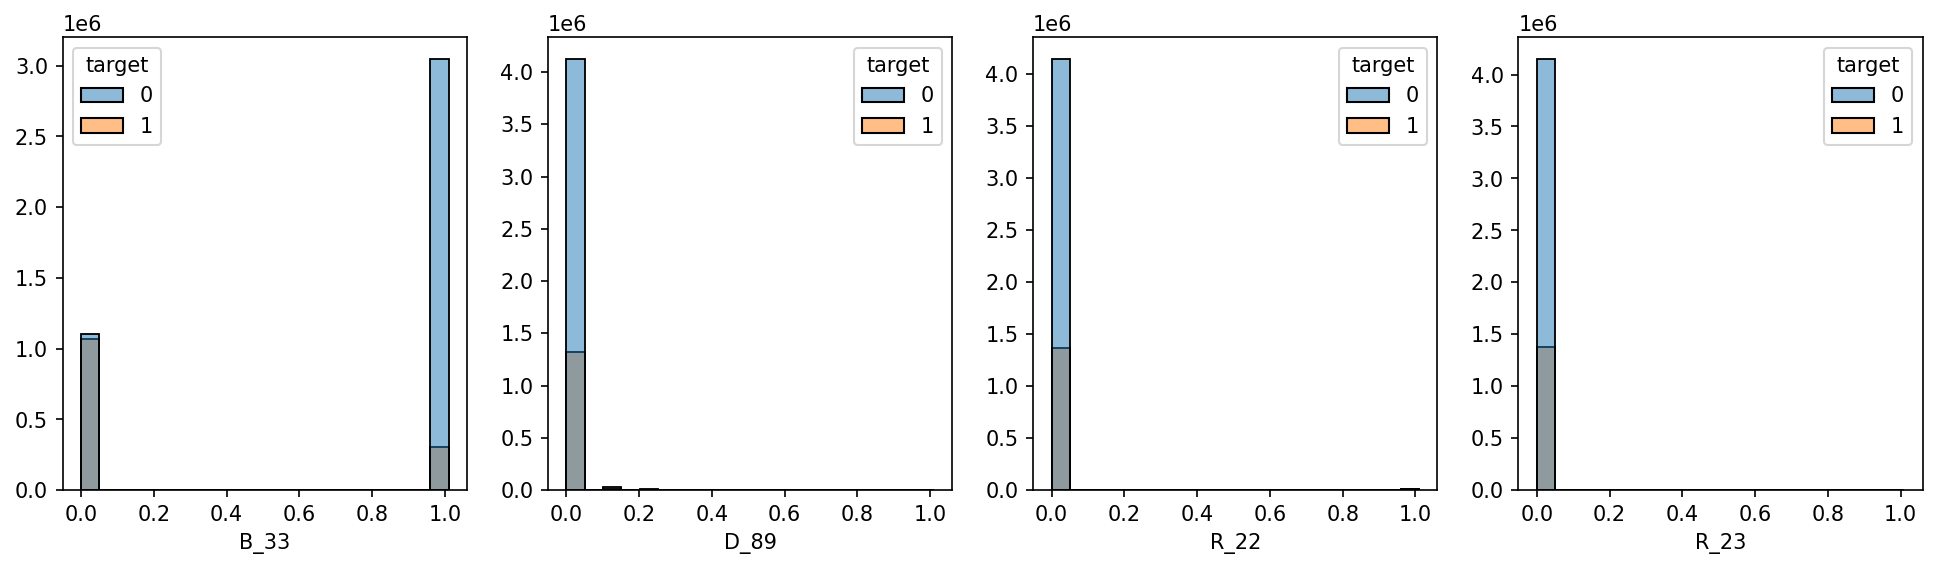

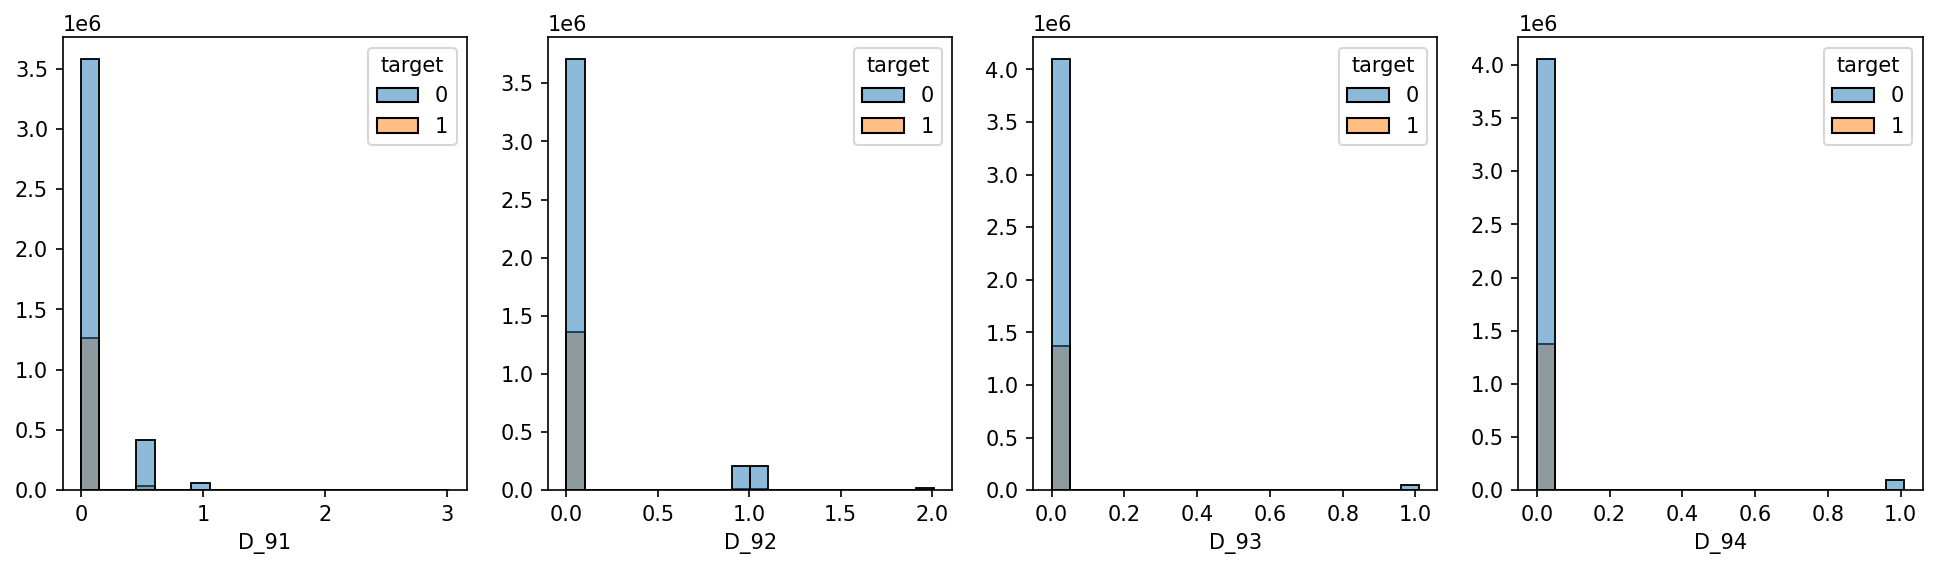

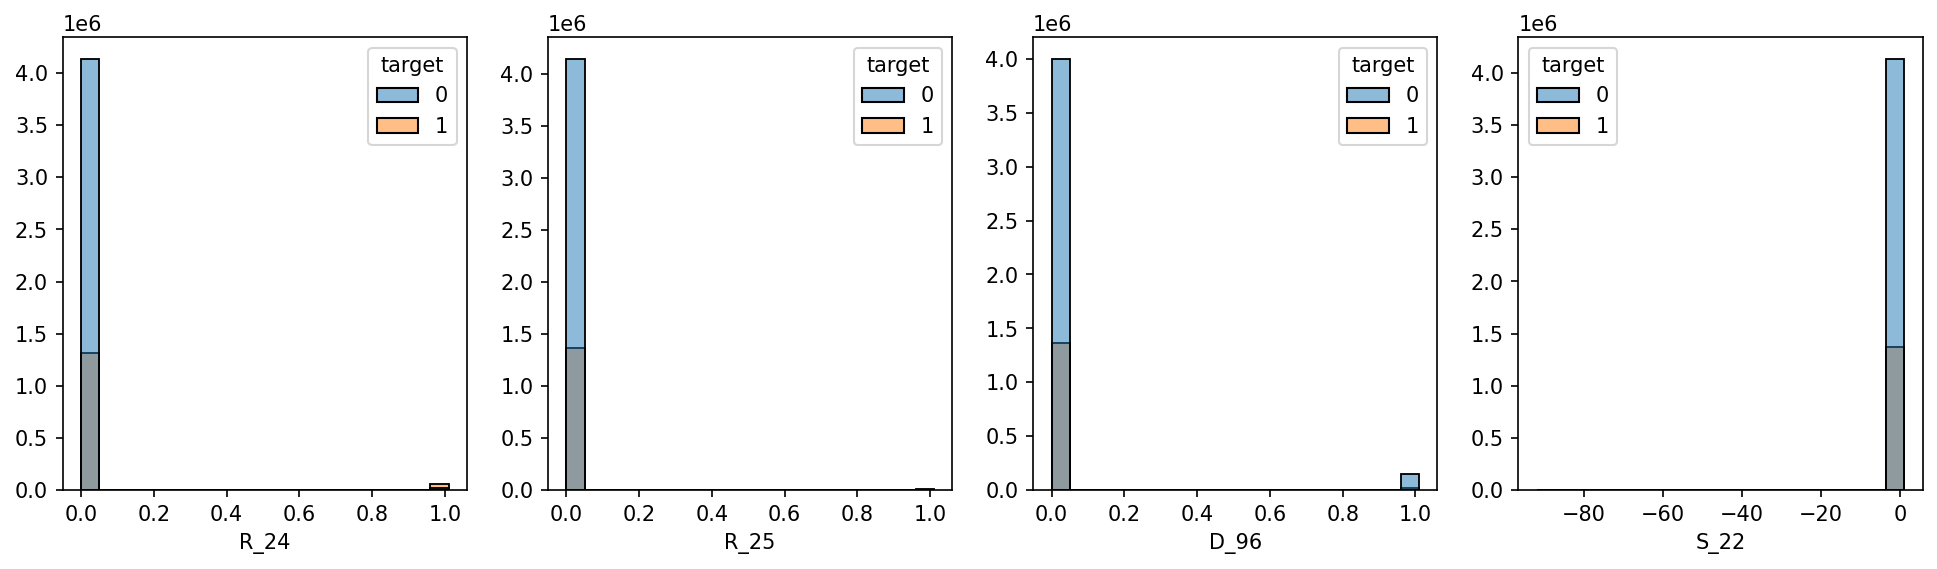

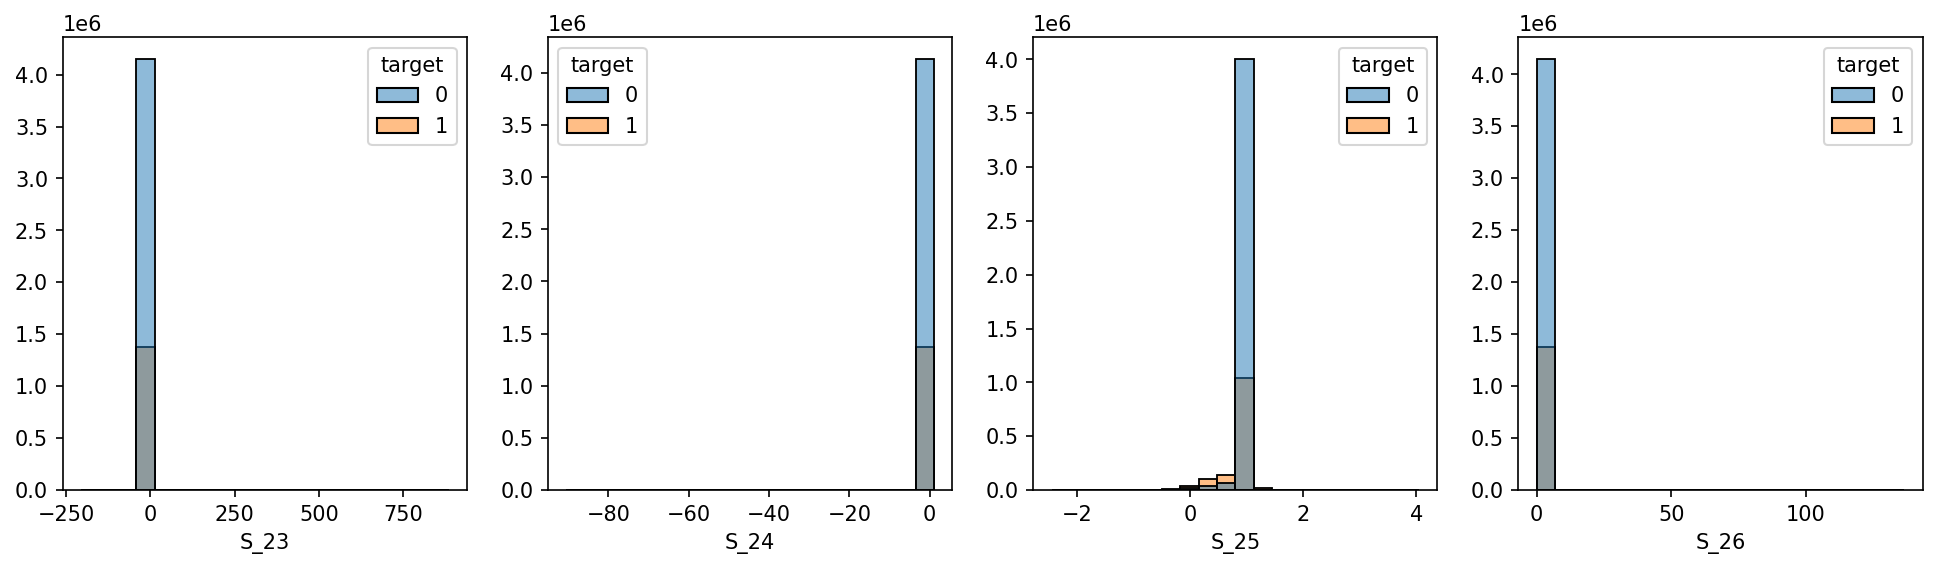

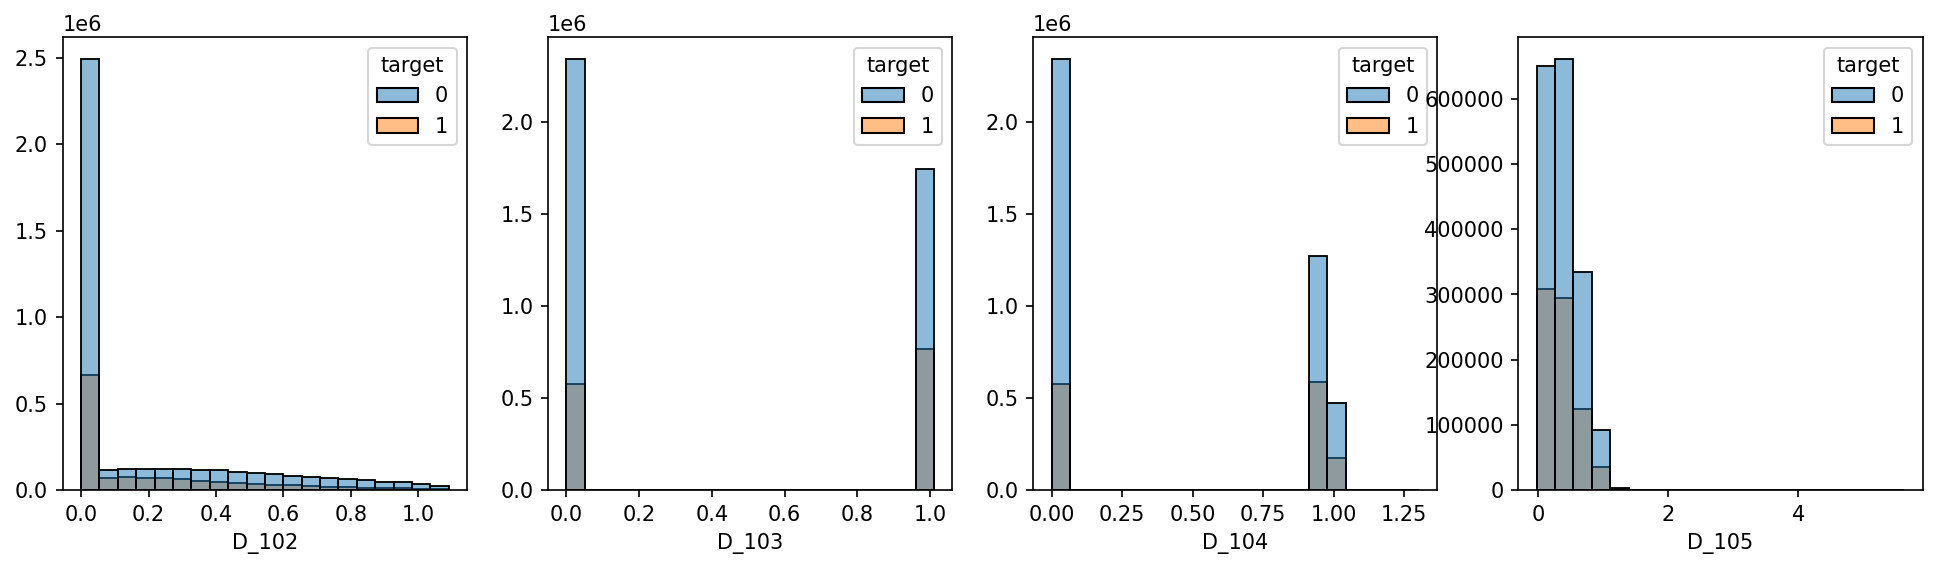

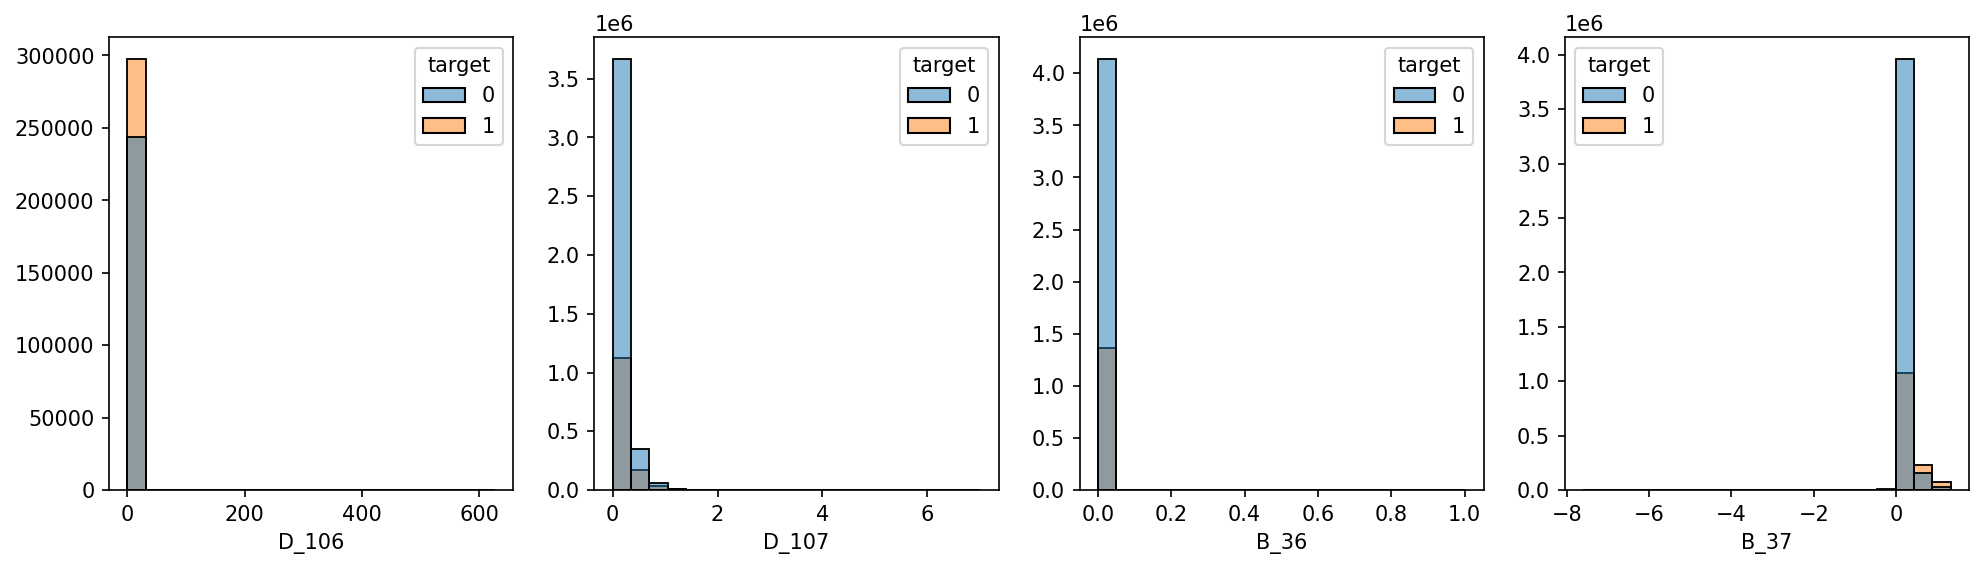

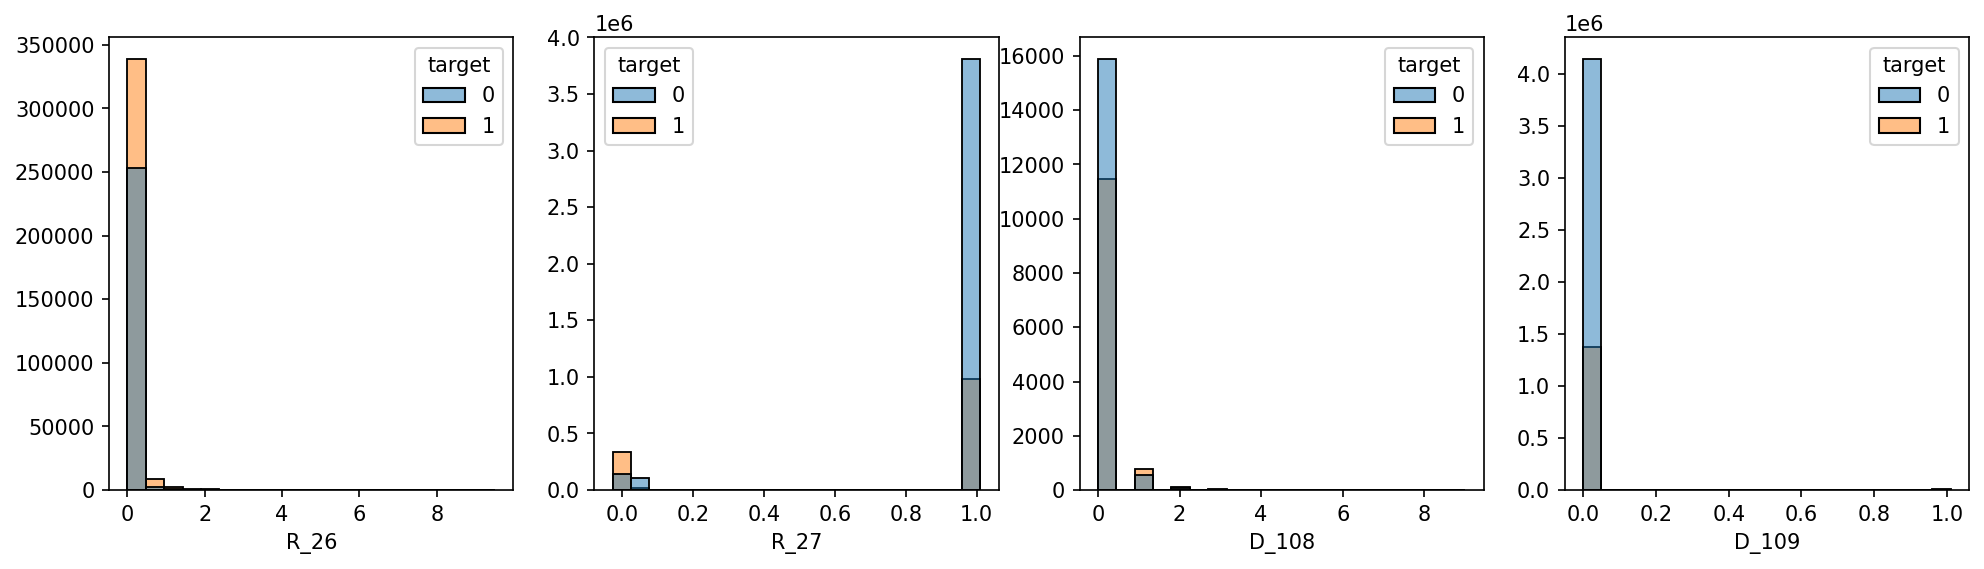

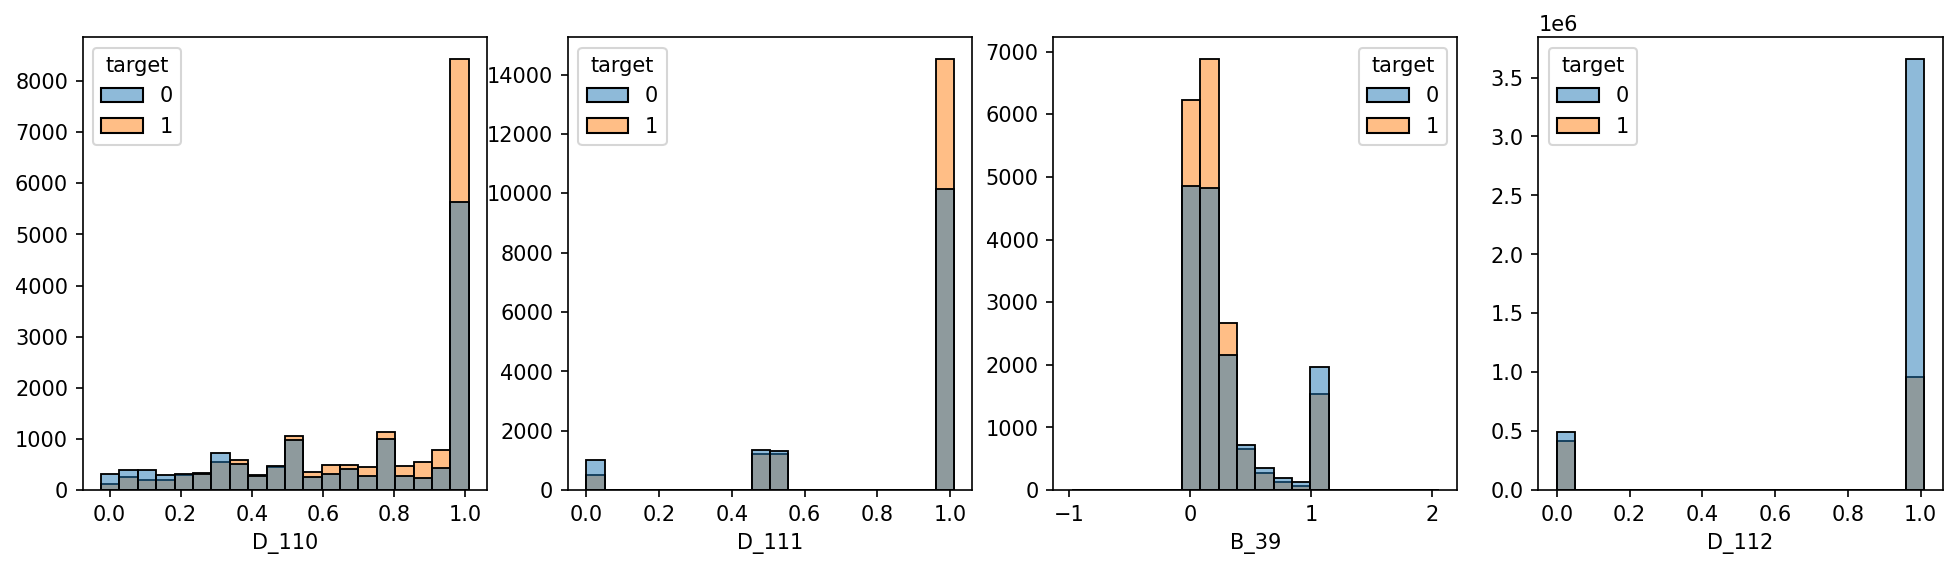

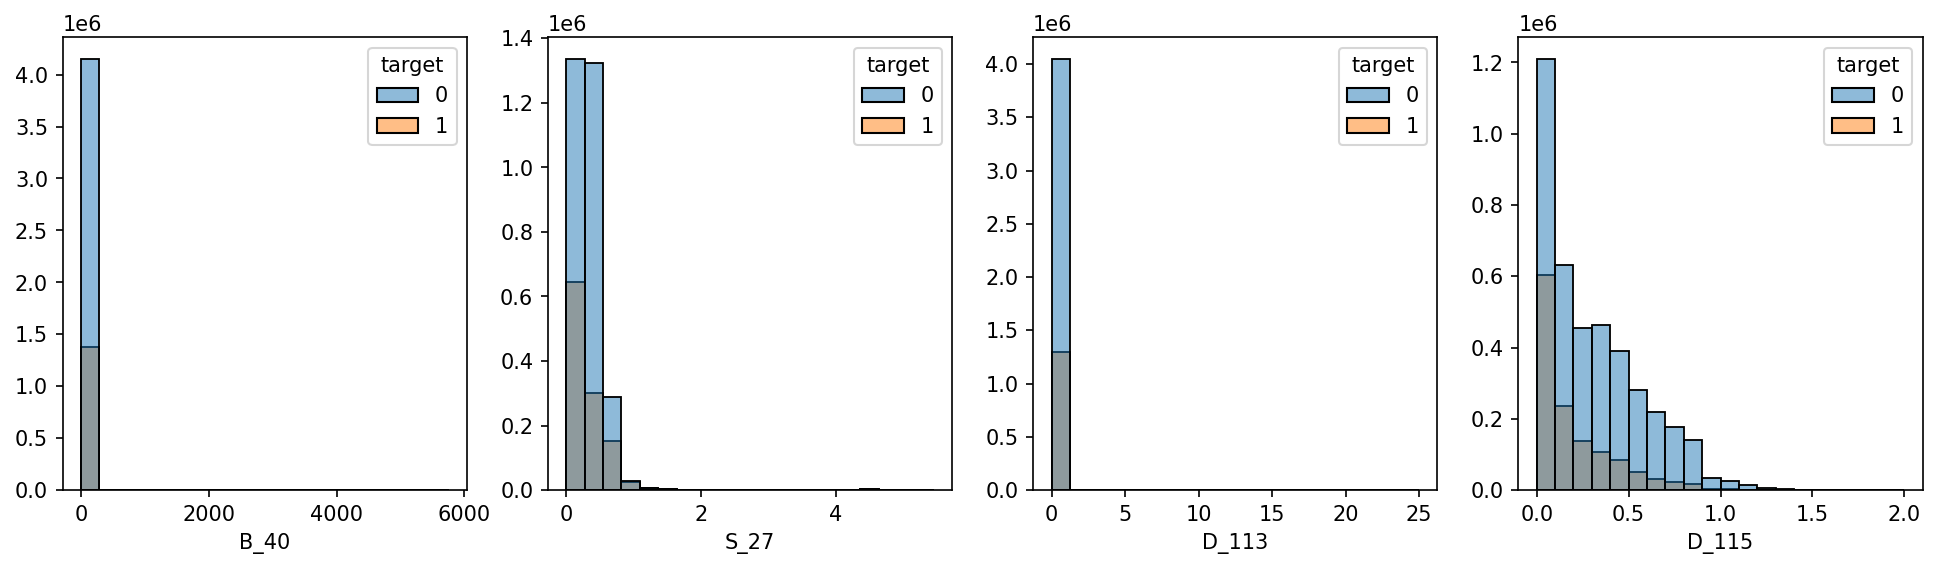

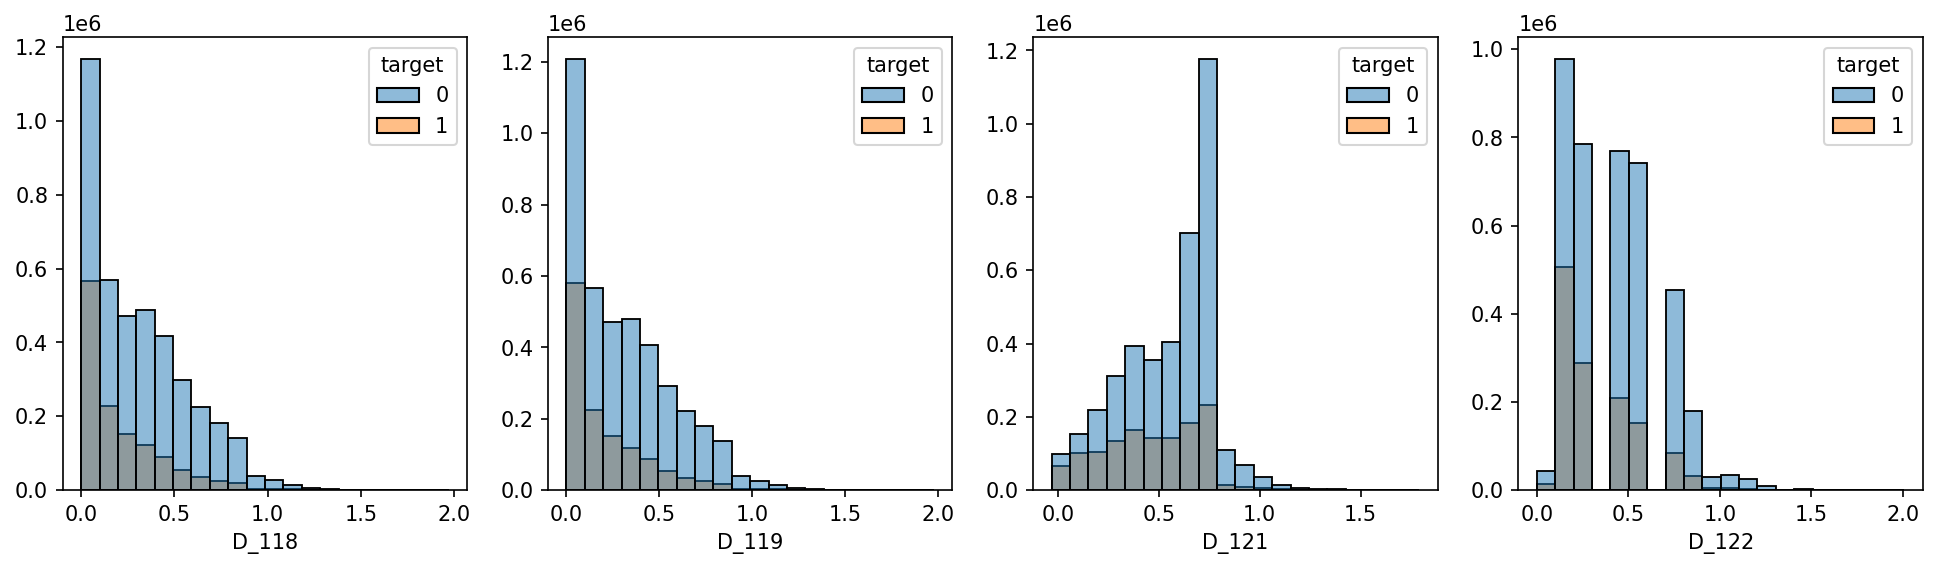

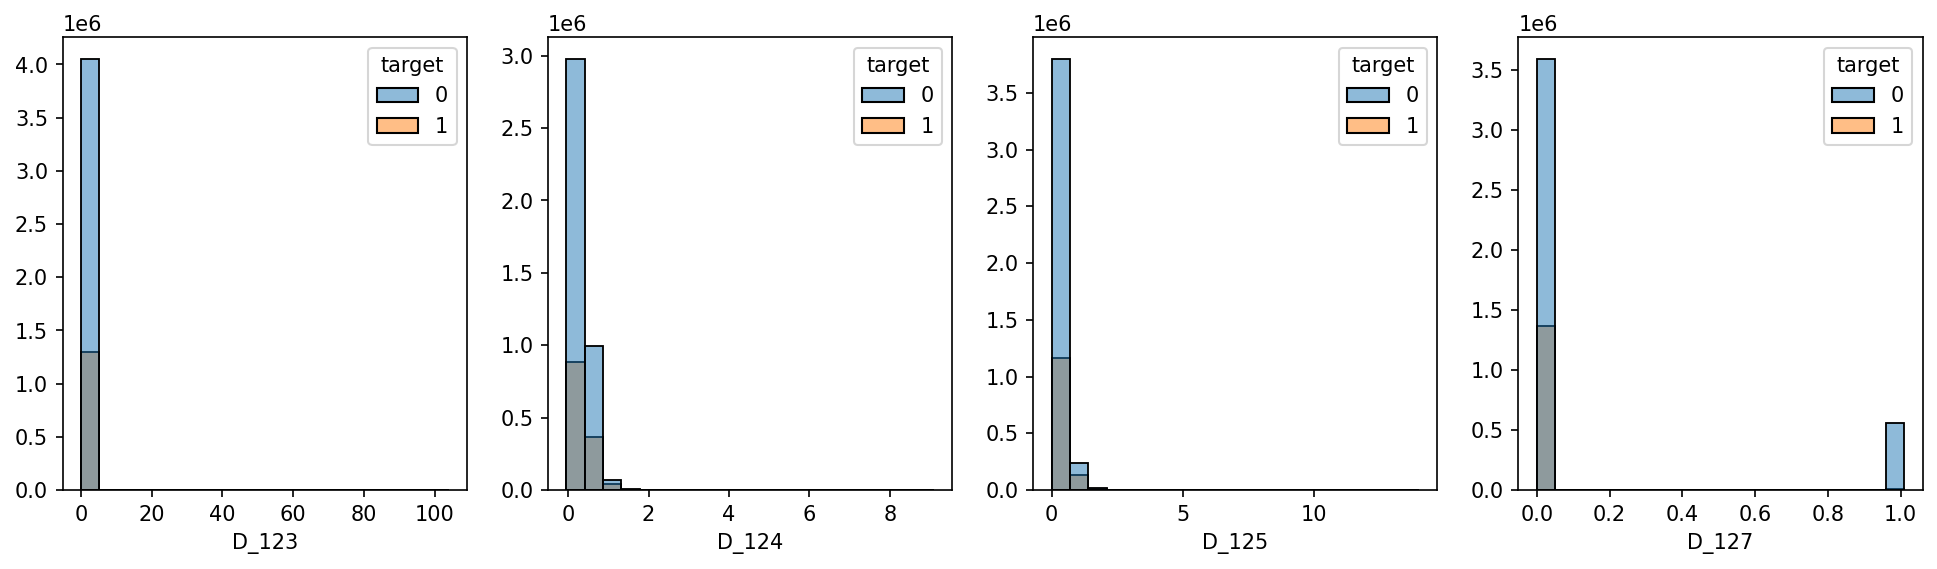

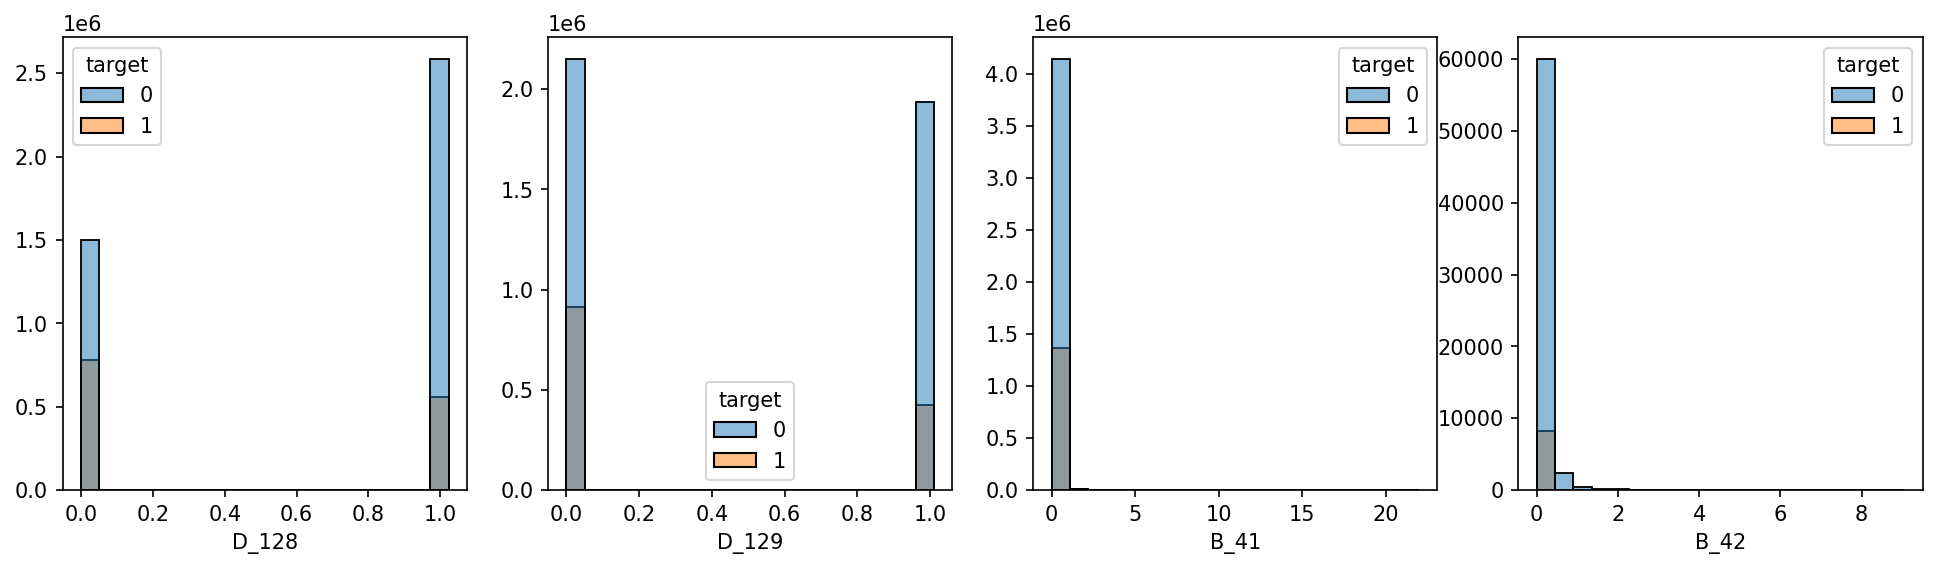

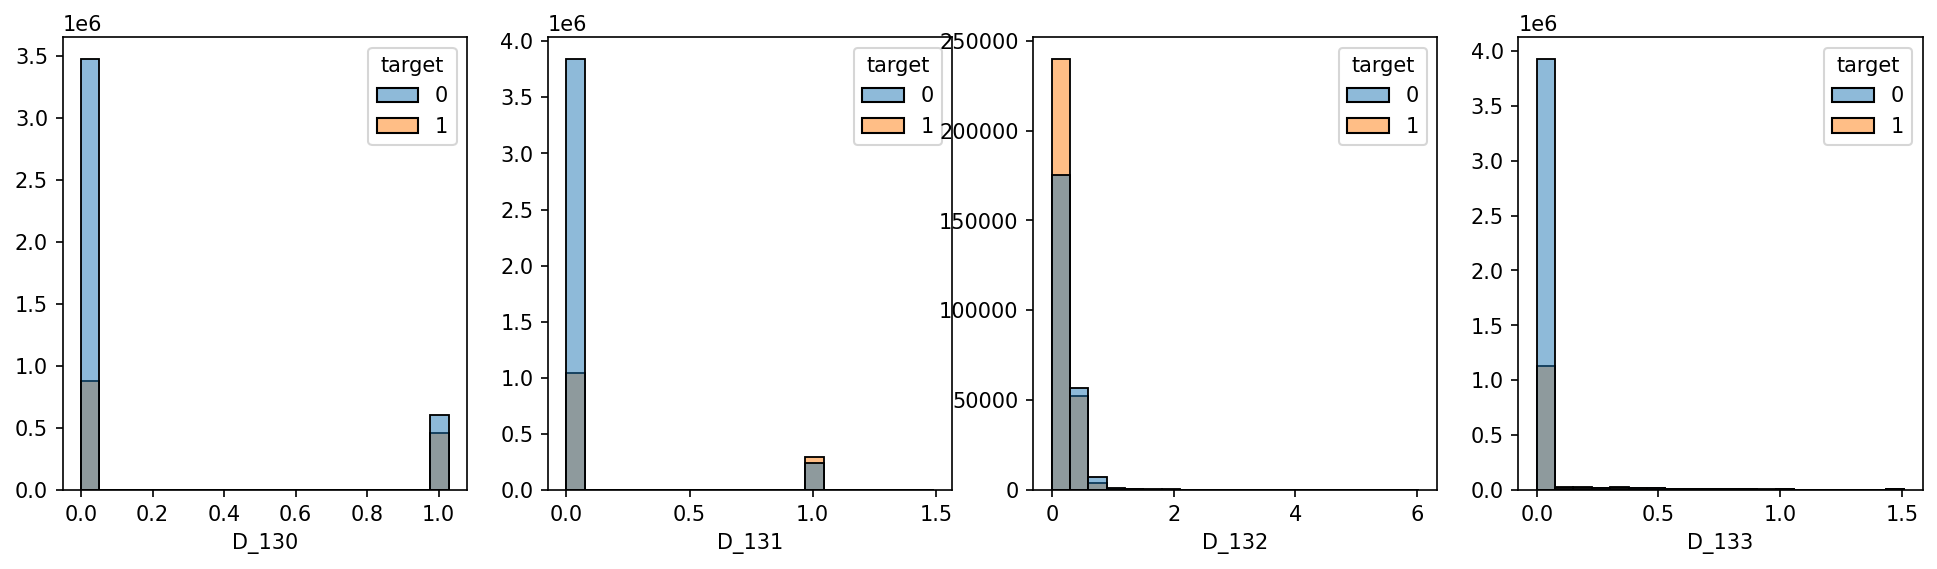

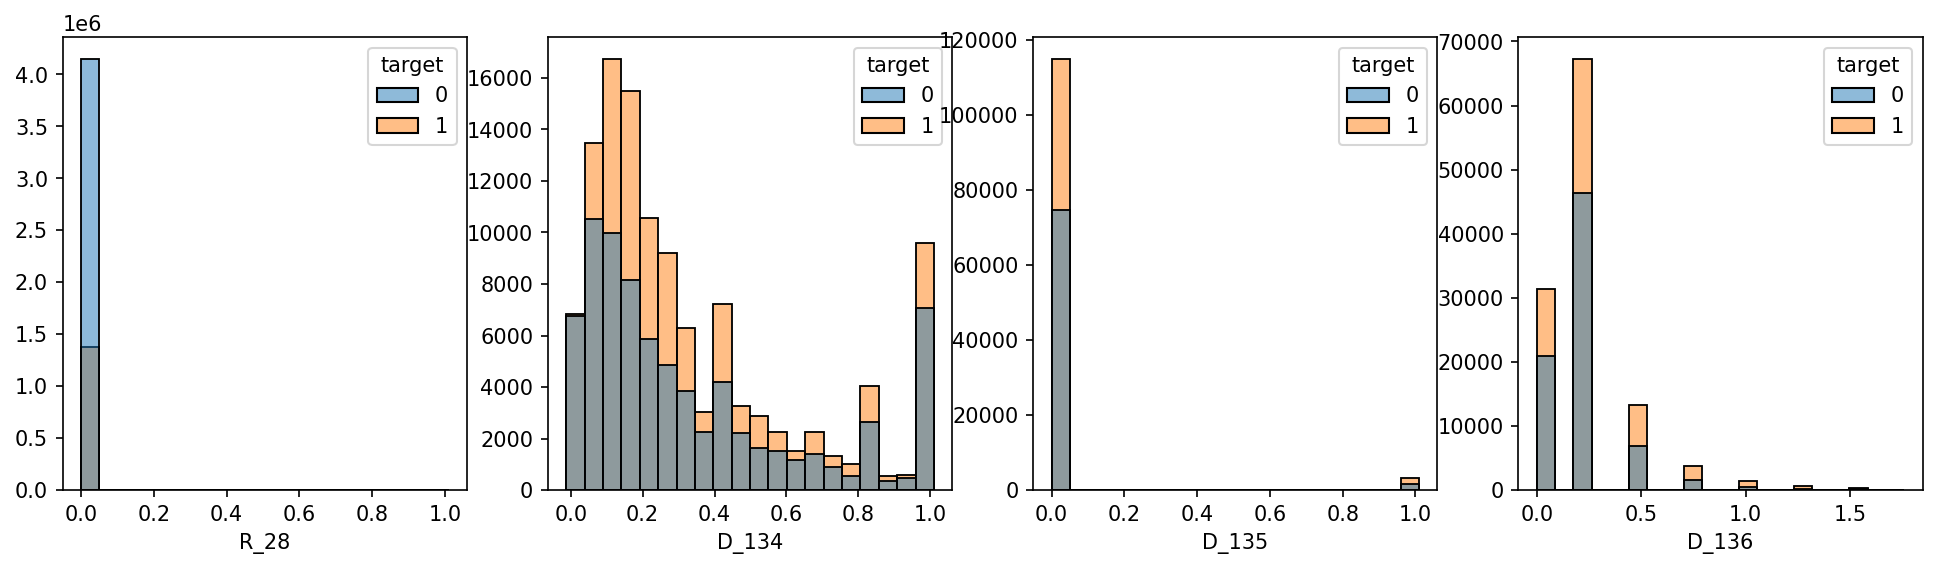

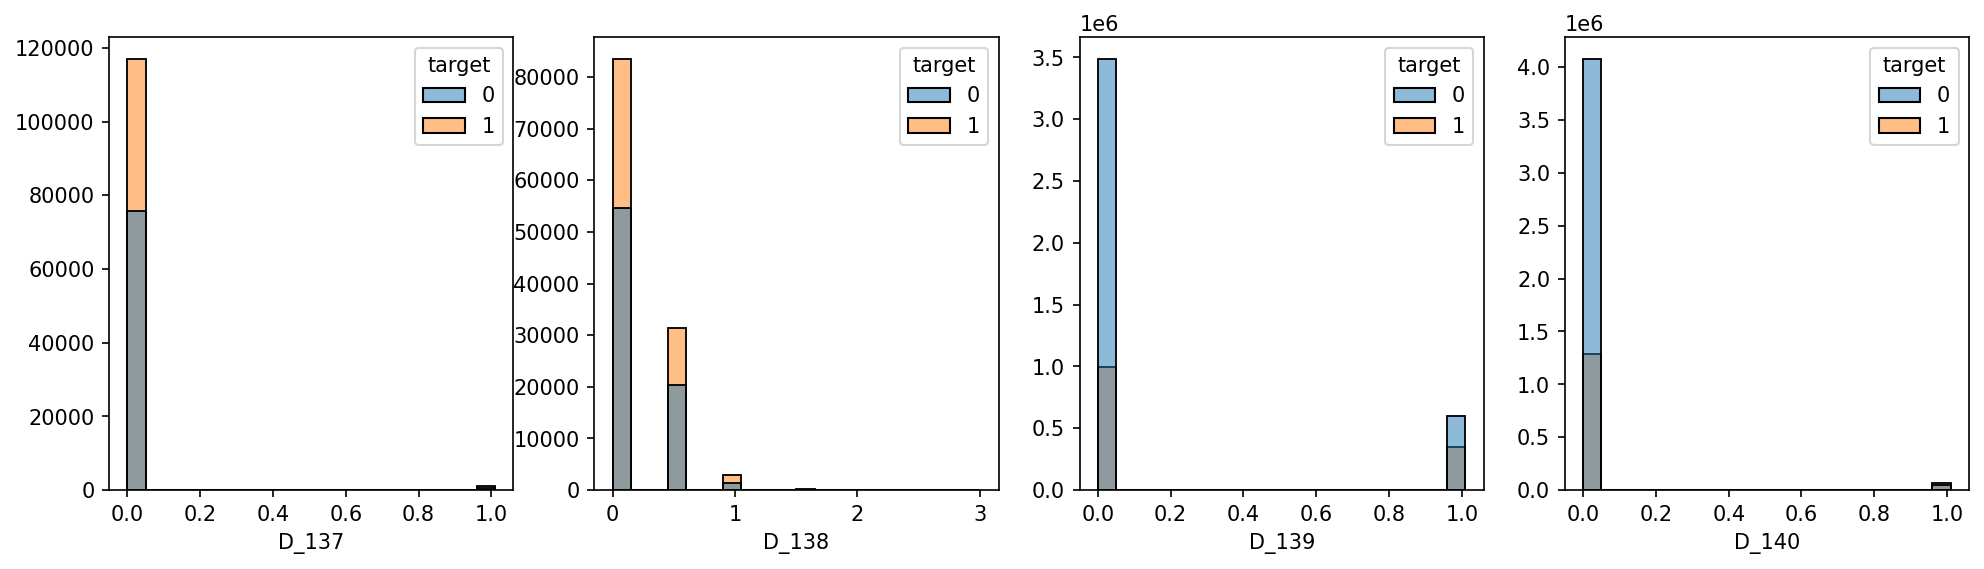

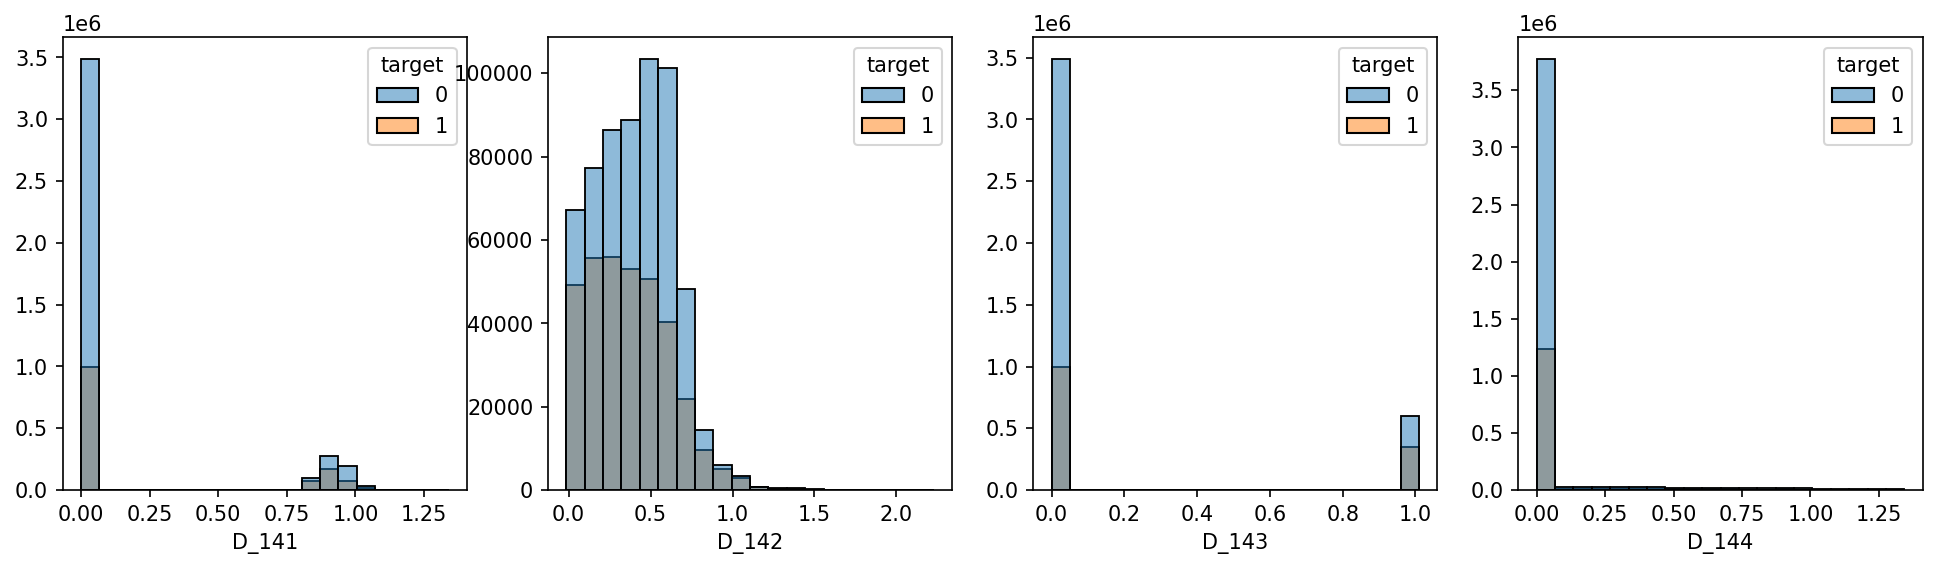

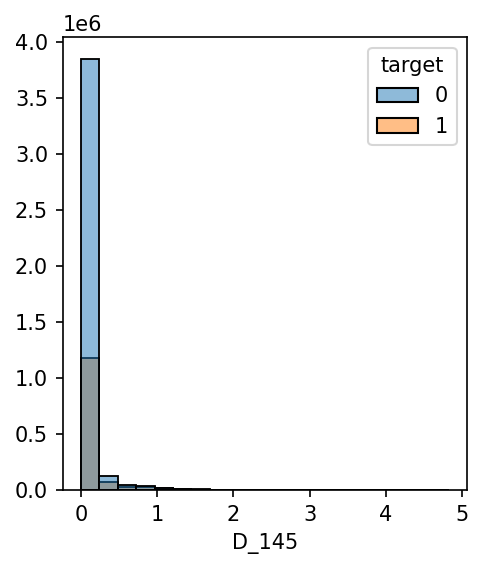

In [72]:
ind = 0
for col in num_features:    
    if ind % 4 == 0:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 4, ind % 4 + 1)
    
    sn.histplot(data=df_train, x=col, hue="target", bins=20)
    plt.ylabel("")
    
    if ind % 4 == 3:
        plt.show()
    
    ind += 1

In [73]:
plt.savefig('num_features.png')

<Figure size 900x600 with 0 Axes>